In [1]:
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # List all CSV files in the folder
# folder_path = '../data/aor_v2'

# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# # Sort files to group them by the experiment
# csv_files.sort()

# # Loop over experiments (assuming each experiment has 3 associated CSV files)
# for i in range(0, len(csv_files), 3):
#     # Read weight measurements
#     weight_df = pd.read_csv(os.path.join(folder_path, csv_files[i+2]), header=None)
#     weight_df.columns = ['time_s', 'weight_g']
#     weight_df['time_ms'] = weight_df['time_s'] * 1000  # Convert time to ms
#     weight_df.drop(columns=['time_s'], inplace=True)
    
#     # Read angle measurements from the first camera
#     angle1_df = pd.read_csv(os.path.join(folder_path, csv_files[i+1]), header=None)
#     angle1_df.columns = ['frame_number', 'left_angle_1', 'right_angle_1']
#     angle1_df['time_ms'] = (angle1_df['frame_number'] * 1000) / 30  # Convert frame number to ms
#     angle1_df.drop(columns=['frame_number'], inplace=True)
    
#     # Read angle measurements from the second camera
#     angle2_df = pd.read_csv(os.path.join(folder_path, csv_files[i]), header=None)
#     angle2_df.columns = ['frame_number', 'left_angle_2', 'right_angle_2']
#     angle2_df['time_ms'] = (angle2_df['frame_number'] * 1000) / 30  # Convert frame number to ms
#     angle2_df.drop(columns=['frame_number'], inplace=True)
    
#     # Merge all dataframes on time_ms
#     merged_df = pd.merge_asof(weight_df.sort_values('time_ms'), 
#                               angle1_df.sort_values('time_ms'), 
#                               on='time_ms')
    
#     merged_df = pd.merge_asof(merged_df.sort_values('time_ms'), 
#                               angle2_df.sort_values('time_ms'), 
#                               on='time_ms')


In [2]:
from scipy.signal import medfilt
import numpy as np# Calculate the flow rate as the derivative of the weight with respect to time

# # Apply median filter to remove spikes in weight data
# merged_df['weight_g_filtered'] = medfilt(merged_df['weight_g'], kernel_size=13)

# # Flip the sign of left angles
# merged_df['left_angle_1_flipped'] = -1 * merged_df['left_angle_1']
# merged_df['left_angle_2_flipped'] = -1 * merged_df['left_angle_2']


# # Convert the flow rate to g/s from g/ms
# merged_df['flow_rate_gs'] = merged_df['flow_rate'] * 1000  # 1 s = 1000 ms
# merged_df['flow_rate_filtered'] = medfilt(merged_df['flow_rate_gs'], kernel_size=9)
# # Convert the timeline from milliseconds to seconds for plotting
# merged_df['flow_rate'] = np.gradient(merged_df['weight_g_filtered'], merged_df['time_ms'])
# merged_df['time_s'] = merged_df['time_ms'] / 1000  # 1 s = 1000 ms

# # Plotting


In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Adding an 'experiment_id' column to the data for each experiment and appending them to a single DataFrame


# List all CSV files in the folder
folder_path = '../data/aor_v2'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Sort files to group them by the experiment
csv_files.sort()


final_single_df = pd.DataFrame()
all_exp_df= pd.DataFrame()
for i in range(0, len(csv_files), 3):
    # Read weight measurements
    weight_df = pd.read_csv(os.path.join(folder_path, csv_files[i+2]), header=None)
    weight_df.columns = ['time_s', 'weight_g']
    weight_df['time_ms'] = weight_df['time_s']  # Convert time to ms
    weight_df.drop(columns=['time_s'], inplace=True)
    
    # Read angle measurements from the first camera
    angle11_df = pd.read_csv(os.path.join(folder_path, csv_files[i+1]), header=None)
    angle11_df.columns = ['frame_number', 'left_angle', 'right_angle']
    angle11_df['time_ms'] = (angle11_df['frame_number']) / 30  # Convert frame number to ms
    angle11_df.drop(columns=['frame_number'], inplace=True)
    
    # Read angle measurements from the second camera
    angle22_df = pd.read_csv(os.path.join(folder_path, csv_files[i]), header=None)
    angle22_df.columns = ['frame_number', 'left_angle', 'right_angle']
    angle22_df['time_ms'] = (angle22_df['frame_number']) / 30  # Convert frame number to ms
    angle22_df.drop(columns=['frame_number'], inplace=True)
    
    
    # Merge all dataframes on time_
    
    merged_df_1 = pd.merge_asof(weight_df.sort_values('time_ms'), 
                            angle11_df.sort_values('time_ms'), 
                            on='time_ms')
        
    merged_df_2 = pd.merge_asof(weight_df.sort_values('time_ms'), 
                        angle22_df.sort_values('time_ms'), 
                        on='time_ms')
    
    # Plotting

#####################################
        # Plotting
    # Create a DataFrame for this experiment
    merged_df_2['experiment_id'] = str(10 + int((i + 3) / 3))# + ' '  # 'experiment_id' as a string label

    # Apply median filter to remove spikes in weight data
    merged_df_2['weight_g_filtered'] = medfilt(merged_df_2['weight_g'], kernel_size=5)
    
    # Calculate the flow rate as the derivative of the weight with respect to time
    merged_df_2['flow_rate'] = np.gradient(merged_df_2['weight_g_filtered'], merged_df_2['time_ms'])
    merged_df_2['flow_rate_filtered'] = medfilt(merged_df_2['flow_rate'], kernel_size=21)

    # Convert the flow rate to g/s from g/ms
    merged_df_2['flow_rate_gs'] = merged_df_2['flow_rate_filtered'] * 1000  # 1 s = 1000 ms
    
    # Convert the timeline from milliseconds to seconds for plotting
    merged_df_2['time_s'] = merged_df_2['time_ms'] / 1000  # 1 s = 1000 ms
    
    # Flip the sign of left angles
    # merged_df_2['left_angle_1'] = -1 * merged_df_2['left_angle_1']
    merged_df_2['left_angle'] = -1 * merged_df_2['left_angle']
# Plotting all experiments on the same plot with 'experiment_id' for differentiation

#####################################
        # Plotting
    # Create a DataFrame for this experiment
    merged_df_1['experiment_id'] = str(int((i + 3) / 3))# + ' ' # 'experiment_id' as a string label

    # Apply median filter to remove spikes in weight data
    merged_df_1['weight_g_filtered'] = medfilt(merged_df_1['weight_g'], kernel_size=5)
    
    # Calculate the flow rate as the derivative of the weight with respect to time
    merged_df_1['flow_rate'] = np.gradient(merged_df_1['weight_g_filtered'], merged_df_1['time_ms'])
    merged_df_1['flow_rate_filtered'] = medfilt(merged_df_1['flow_rate'], kernel_size=21)

    # Convert the flow rate to g/s from g/ms
    merged_df_1['flow_rate_gs'] = merged_df_1['flow_rate_filtered'] * 1000  # 1 s = 1000 ms
    
    # Convert the timeline from milliseconds to seconds for plotting
    merged_df_1['time_s'] = merged_df_1['time_ms'] / 1000  # 1 s = 1000 ms
    
    # Flip the sign of left angles
    merged_df_1['left_angle'] = -1 * merged_df_1['left_angle']
    # merged_df_1['left_angle_2'] = -1 * merged_df_1['left_angle_2']
    merged_df_all1 = pd.merge_asof(weight_df.sort_values('time_ms'), 
                              merged_df_1.sort_values('time_ms'), 
                              on='time_ms')
    merged_df_all2 = pd.merge_asof(weight_df.sort_values('time_ms'), 
                            merged_df_2.sort_values('time_ms'), 
                            on='time_ms')
    merged_both = pd.concat([merged_df_all1, merged_df_all2], ignore_index=True)

    all_exp_df = pd.concat([all_exp_df, merged_both], ignore_index=True)
        # final_single_df = pd.concat([final_single_df, merged_df], ignore_index=True)



In [4]:
all_exp_df['experiment_id'].unique()

array(['1', '11', '2', '12', '3', '13', '4', '14', '5', '15', '6', '16',
       '7', '17', '8', '18', '9', '19', '10', '20'], dtype=object)

In [5]:
def find_index_range(df, column, threshold):
    # Create a new column 'below_threshold' that is True when 'angle' is below the threshold and False otherwise
    df['below_threshold'] = df[column] < threshold

    # Compute differences in 'below_threshold' to find where it changes
    df['below_threshold_diff'] = df['below_threshold'].astype(int).diff()

    # Identify the start and end of each range
    starts = df[df['below_threshold_diff'] == 1].index
    ends = df[df['below_threshold_diff'] == -1].index

    # If the first range starts from the first row, add 0 at the beginning of ends
    if starts[0] == 0:
        ends = np.r_[0, ends]

    # If the last range goes to the last row, add the index of the last row to ends
    if starts[-1] > ends[-1]:
        ends = np.r_[ends, df.index[-1]]

    # Compute lengths of the ranges
    lengths = ends - starts

    # Get the index of the longest range
    max_range_idx = lengths.argmax()

    # Get the start and end index of the longest range
    start_idx, end_idx = starts[max_range_idx], ends[max_range_idx]

    print(f'The longest range where the angle is less than {threshold} is from {start_idx} to {end_idx}.')
    return start_idx, end_idx

def calculate_stats(s):
    stats = {
        'cummax': [s.cummax().iloc[-1]],  # taking the last value as it's a cumulative statistic
        'cummin': [s.cummin().iloc[-1]],  # taking the last value as it's a cumulative statistic
        'median': [s.median()],
        'mean': [s.mean()],
        'std': [s.std()],
        'var': [s.var()],
        'skew': [s.skew()],
        'kurt': [s.kurt()],
    }
    return stats


In [6]:
final_single_df

""


In [7]:
# final_single_df.head()
# df_filtered = final_single_df
# win = 15

# df_filtered["filtered_left_1"] = df_filtered["left_angle_1"].rolling(win).mean()
# df_filtered["filtered_left_1"] = df_filtered["filtered_left_1"].fillna(0)

# df_filtered["filtered_left_2"] = df_filtered["left_angle_2"].rolling(win).mean()
# df_filtered["filtered_left_2"] = df_filtered["filtered_left_2"].fillna(0)

# df_filtered["filtered_right_1"] = df_filtered["right_angle_1"].rolling(win).mean()
# df_filtered["filtered_right_1"] = df_filtered["filtered_right_1"].fillna(0)

# df_filtered["filtered_right_2"] = df_filtered["right_angle_2"].rolling(win).mean()
# df_filtered["filtered_right_2"] = df_filtered["filtered_right_2"].fillna(0)

# df_filtered["mean_L"] = (df_filtered['left_angle_1'] + df_filtered['right_angle_1']) / 2
# df_filtered["mean_R"] = (df_filtered['left_angle_2'] + df_filtered['right_angle_2']) / 2

# df_filtered["filtered_mean_L"] = df_filtered["mean_L"].rolling(win).mean()
# df_filtered["filtered_mean_L"] = df_filtered["filtered_mean_L"].fillna(0)

# df_filtered["filtered_mean_R"] = df_filtered["mean_R"].rolling(win).mean()
# df_filtered["filtered_mean_R"] = df_filtered["filtered_mean_R"].fillna(0)
all_exp_df.head()
df_filtered = all_exp_df.copy()
df_filtered = all_exp_df.copy()

win = 1

df_filtered["filtered_left"] = df_filtered["left_angle"].rolling(win).mean()
df_filtered["filtered_left"] = df_filtered["filtered_left"].fillna(0)


df_filtered["filtered_right"] = df_filtered["right_angle"].rolling(win).mean()
df_filtered["filtered_right"] = df_filtered["filtered_right"].fillna(0)


df_filtered["mean"] = (df_filtered['left_angle'] + df_filtered['right_angle']) / 2
# df_filtered["mean_R"] = (df_filtered['left_angle_2'] + df_filtered['right_angle_2']) / 2

df_filtered["filtered_mean"] = df_filtered["mean"].rolling(win).mean()
df_filtered["filtered_mean"] = df_filtered["filtered_mean"].fillna(0)

# df_filtered["filtered_mean_R"] = df_filtered["mean_R"].rolling(win).mean()
# df_filtered["filtered_mean_R"] = df_filtered["filtered_mean_R"].fillna(0)


In [8]:
# from statsmodels.tsa.stattools import adfuller
# # df_filtered["Tilt"] = df_filtered["Filtered Left"] - df_filtered["Filtered Right"]
# average = {}
# statistics = {}
# # df_filtered = final_single_df
# new_df = pd.DataFrame()
# i = 0
# for value, group_df in df_filtered.groupby('experiment_id'):
    
#     print(f'|#####################################|')
#     # group_df['Right Angle Derivative'].min
#     group_df['dt_filtered_right_1'] = group_df['filtered_right_1'].diff()
#     group_df['dt_filtered_left_1'] = group_df['filtered_left_1'].diff()
#     group_df['ddt_filtered_right_1'] = group_df['dt_filtered_right_1'].diff()
#     group_df['ddt_filtered_left_1'] = group_df['dt_filtered_left_1'].diff()
#     group_df['R_Der'] = group_df["dt_filtered_left_1"].rolling(7).std()   
#     group_df['Column_Integral'] = group_df['R_Der'].rolling(10).std()
#     group_df['Tilt'] = group_df['filtered_left_1'] - group_df['filtered_right_1']
#     # group_df['Tilt'] = 
#     # 0.7
#     start_idx, end_idx = find_index_range(group_df, 'R_Der', 1.2)
    
#     cropped_df = group_df.loc[start_idx:end_idx].copy()
    
#     # reversed_series = group_df['R_Der'][::-1]
#     # stable_index_reversed = (reversed_series.abs() >= 2.5).idxmax()
#     # stable_index = group_df.shape[0] - stable_index_reversed - 1
#     # print(f'Stable index: {stable_index}/{group_df.shape[0]}')
#     perc = cropped_df['filtered_left_1'].shape[0] / group_df['filtered_left_1'].shape[0] * 100
#     print(f"Used range: {perc:.2f}% of experiment")
#     result = adfuller(group_df['filtered_left_1'], None, 'c')
#     result_crop = adfuller(cropped_df['filtered_left_1'], None, 'c')
#     print(f'ADF Statistic: {result[0]} -> {result_crop[0]}')
#     print(f'p-value: {result[1]} -> {result_crop[1]}')
#     # print('Critical Values:')
#     # for key, val in result[4].items():
#     #     print('\t%s: %.3f' % (key, val))
#     # print('Cropped Critical Values:')
#     # for key, val in result_crop[4].items():
#     #     print('\t%s: %.3f' % (key, val))
        
#     average[value] = cropped_df['Tilt'].mean()
#     # print(f'Tilt for {value}: {average[value]}')
#     # print(group_df.index)
#     # stats[value]
#     tilt_cal = [-0.6, 0.7]
#     cropped_df['filtered_left_1'] = cropped_df['filtered_left_1'] - (tilt_cal[0]/2)
#     cropped_df['filtered_right_1'] = cropped_df['filtered_right_1'] + (tilt_cal[0]/2)
#     # cropped_df['filtered_left_1'] = cropped_df['filtered_left_1'] - tilt_cal[0]/2
#     # cropped_df['filtered_right_1'] = cropped_df['filtered_right_1'] + tilt_cal[1]/2
    
    
#     statistics[str(value)+'-1L'] = calculate_stats(cropped_df['filtered_left_1'])
#     statistics[str(value)+'-1R'] = calculate_stats(cropped_df['filtered_right_1'])
    
    
#     new_df = pd.concat([new_df, cropped_df])
    
# print(new_df.shape)
# print(final_single_df.shape)
# new_df.describe()

from statsmodels.tsa.stattools import adfuller
# df_filtered["Tilt"] = df_filtered["Filtered Left"] - df_filtered["Filtered Right"]
average = {}
statistics = {}
# df_filtered = final_single_df
new_df = pd.DataFrame()
i = 0
for value, group_df in df_filtered.groupby('experiment_id'):
    
    print(f'|#####################################|')
    print(value)
    # group_df['Right Angle Derivative'].min
    group_df['dt_filtered_right'] = group_df['filtered_right'].diff()
    group_df['dt_filtered_left'] = group_df['filtered_left'].diff()
    group_df['ddt_filtered_right'] = group_df['dt_filtered_right'].diff()
    group_df['ddt_filtered_left'] = group_df['dt_filtered_left'].diff()
    group_df['R_Der'] = group_df["dt_filtered_left"].rolling(7).std()   
    group_df['Column_Integral'] = group_df['R_Der'].rolling(10).std()
    group_df['Tilt'] = group_df['filtered_left'] - group_df['filtered_right']
    # group_df['Tilt'] = 
    # 0.7
    start_idx, end_idx = find_index_range(group_df, 'R_Der', 1.2)
    
    # cropped_df = group_df.loc[start_idx:end_idx].copy()
    cropped_df = group_df.loc[0:].copy()
    # reversed_series = group_df['R_Der'][::-1]
    # stable_index_reversed = (reversed_series.abs() >= 2.5).idxmax()
    # stable_index = group_df.shape[0] - stable_index_reversed - 1
    # print(f'Stable index: {stable_index}/{group_df.shape[0]}')
    perc = cropped_df['filtered_left'].shape[0] / group_df['filtered_left'].shape[0] * 100
    print(f"Used range: {perc:.2f}% of experiment")
    result = adfuller(group_df['filtered_left'], None, 'c')
    result_crop = adfuller(cropped_df['filtered_left'], None, 'c')
    print(f'ADF Statistic: {result[0]} -> {result_crop[0]}')
    print(f'p-value: {result[1]} -> {result_crop[1]}')
    # print('Critical Values:')
    # for key, val in result[4].items():
    #     print('\t%s: %.3f' % (key, val))
    # print('Cropped Critical Values:')
    # for key, val in result_crop[4].items():
    #     print('\t%s: %.3f' % (key, val))
        
    average[value] = cropped_df['Tilt'].mean()
    # print(f'Tilt for {value}: {average[value]}')
    # print(group_df.index)
    # stats[value]
    tilt_cal = [-0.6, 0.7]
    cropped_df['filtered_left'] = cropped_df['filtered_left'] - (tilt_cal[0]/2)
    cropped_df['filtered_right'] = cropped_df['filtered_right'] + (tilt_cal[0]/2)
    # cropped_df['filtered_left_1'] = cropped_df['filtered_left_1'] - tilt_cal[0]/2
    # cropped_df['filtered_right_1'] = cropped_df['filtered_right_1'] + tilt_cal[1]/2
    
    
    statistics[str(value)] = calculate_stats(cropped_df['filtered_left'])
    # statistics[str(value)+'-1R'] = calculate_stats(cropped_df['filtered_right'])
    
    
    new_df = pd.concat([new_df, cropped_df])
    
print(new_df.shape)
print(final_single_df.shape)
new_df.describe()

|#####################################|
1
The longest range where the angle is less than 1.2 is from 1017 to 1161.
Used range: 100.00% of experiment
ADF Statistic: -2.956003967428938 -> -2.956003967428938
p-value: 0.039212386124799686 -> 0.039212386124799686
|#####################################|
10
The longest range where the angle is less than 1.2 is from 24943 to 25346.
Used range: 100.00% of experiment
ADF Statistic: -3.3660040973321426 -> -3.3660040973321426
p-value: 0.012173844945366613 -> 0.012173844945366613
|#####################################|
11
The longest range where the angle is less than 1.2 is from 1169 to 1370.
Used range: 100.00% of experiment
ADF Statistic: -1.9366408415877667 -> -1.9366408415877667
p-value: 0.3150251969153171 -> 0.3150251969153171
|#####################################|
12
The longest range where the angle is less than 1.2 is from 4457 to 4827.
Used range: 100.00% of experiment
ADF Statistic: -1.7238085797676321 -> -1.7238085797676321
p-value: 0.

,weight_g_x,time_ms,weight_g_y,left_angle,right_angle,weight_g_filtered,flow_rate,flow_rate_filtered,flow_rate_gs,time_s,...,mean,filtered_mean,dt_filtered_right,dt_filtered_left,ddt_filtered_right,ddt_filtered_left,R_Der,Column_Integral,Tilt,below_threshold_diff
count,27306.000000,27306.000000,27306.000000,27172.000000,27172.000000,27306.000000,2.730600e+04,27306.000000,27306.000000,27306.000000,...,27172.000000,27306.000000,27286.000000,27286.000000,27266.000000,27266.000000,27166.000000,26986.000000,27306.000000,27286.000000
mean,178.147884,59.275901,178.147884,41.049783,41.569146,179.957604,3.508967e+00,2.809850,2809.850211,0.059276,...,41.309465,41.106745,0.037244,0.036722,-0.003417,-0.003000,1.556093,0.851703,-0.516815,0.000696
std,145.082513,42.244058,145.082513,16.406333,16.349011,141.745079,2.109375e+01,5.479753,5479.752763,0.042244,...,15.331041,15.563444,5.384347,6.454844,8.832473,10.371674,6.637120,3.333486,11.493583,0.172190
min,-652.693001,0.016722,-652.693001,-89.479099,-88.839414,-22.434845,-5.458303e+02,-3.433438,-3433.437525,0.000017,...,-81.879385,-81.879385,-176.177491,-177.198441,-279.640819,-230.436097,0.000000,0.000000,-141.960659,-1.000000
25%,42.611403,25.254947,42.611403,42.255691,43.630641,42.990984,-4.547474e-13,0.000000,0.000000,0.025255,...,43.675781,43.637380,-0.095641,-0.084450,-0.170238,-0.126499,0.060659,0.021661,-3.907030,0.000000
50%,164.539340,51.354219,164.539340,46.064195,46.833702,164.870922,9.956380e-01,0.619860,619.859670,0.051354,...,46.200395,46.173584,0.000000,0.000000,0.000000,0.000000,0.199701,0.089486,-0.364853,0.000000
75%,309.446650,85.305764,309.446650,48.791672,49.597808,310.141402,4.831754e+00,3.500658,3500.658312,0.085306,...,48.751291,48.734392,0.107845,0.097890,0.203068,0.176518,0.750474,0.343065,1.384609,0.000000
max,500.436920,179.849361,500.436920,89.429836,89.609542,446.082052,3.443585e+02,82.644045,82644.044667,0.179849,...,83.506190,83.506190,170.316170,178.454839,325.222228,355.653279,104.334177,50.216702,165.558082,1.000000


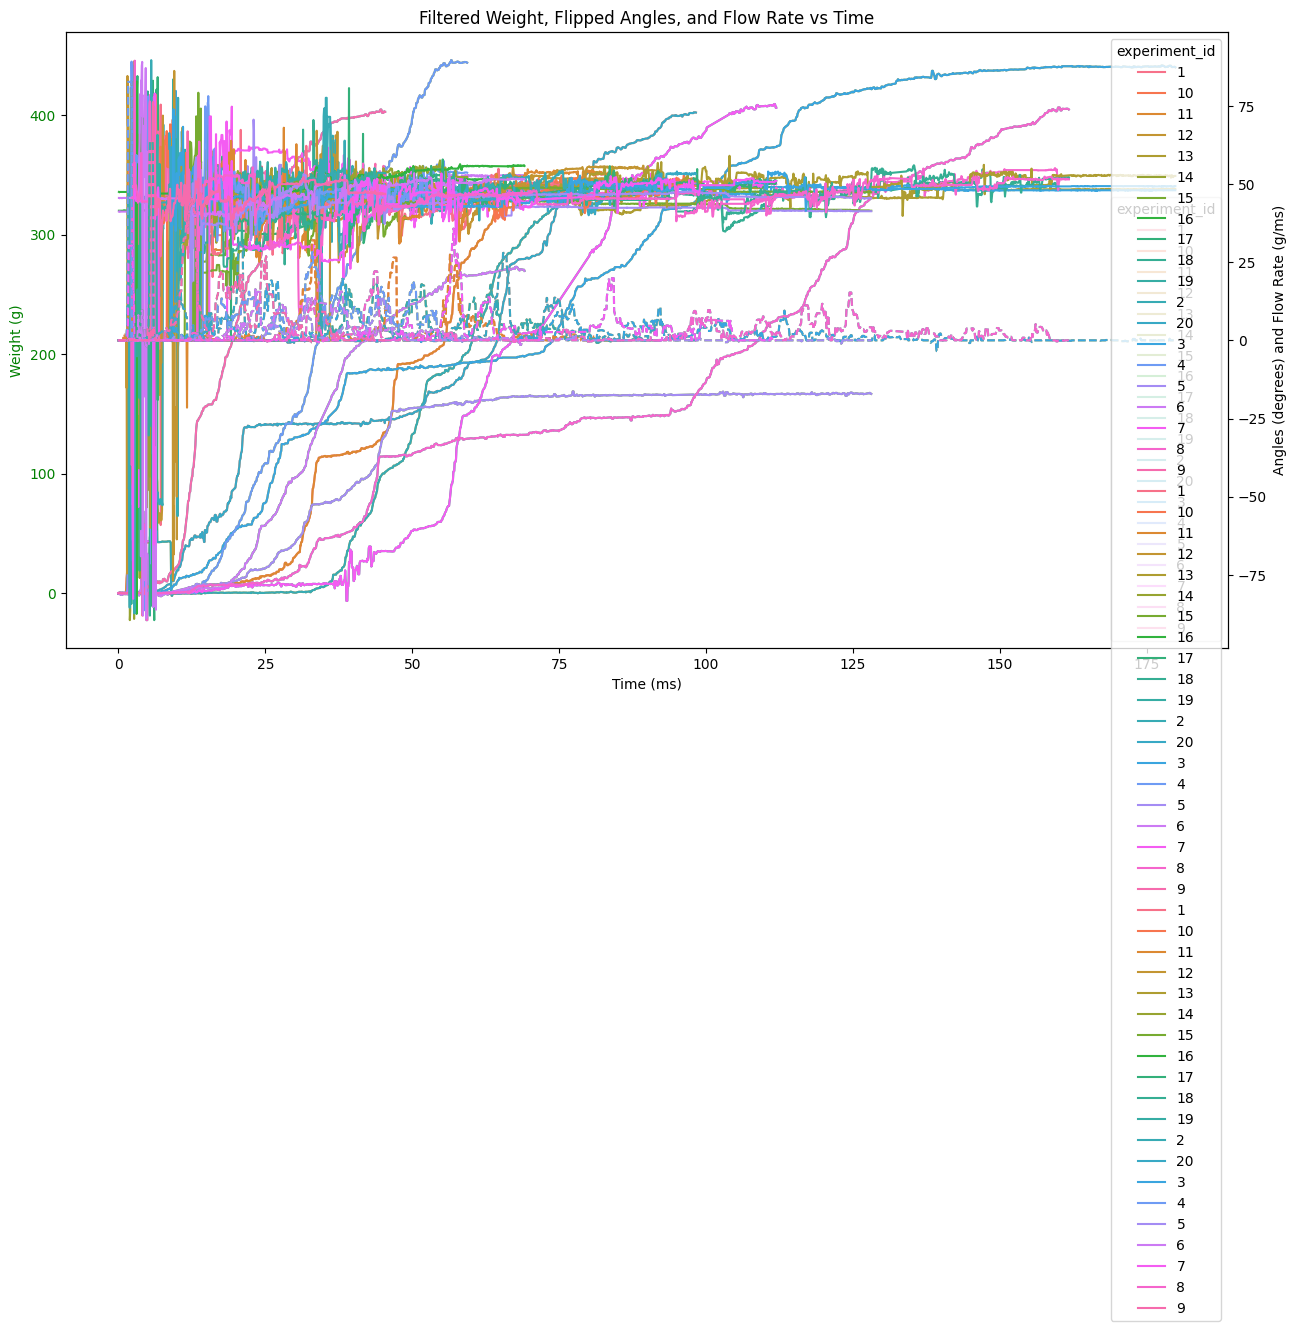

In [9]:

# fig, ax1 = plt.subplots(figsize=(15, 8))

# # Plot weight (in green color) on the primary y-axis
# sns.lineplot(x='time_ms', y='weight_g_filtered', data=new_df, ax=ax1, color='green', label='Weight', hue='experiment_id')
# ax1.set_xlabel('Time (ms)')
# ax1.set_ylabel('Weight (g)', color='g')
# ax1.tick_params(axis='y', labelcolor='g')

# # Create a second y-axis to plot angles
# ax2 = ax1.twinx()
# sns.lineplot(x='time_ms', y='left_angle_1', data=new_df, ax=ax2, label='Left Angle 1', hue='experiment_id')
# sns.lineplot(x='time_ms', y='left_angle_2', data=new_df, ax=ax2, label='Left Angle 2', hue='experiment_id')
# sns.lineplot(x='time_ms', y='right_angle_1', data=new_df, ax=ax2, label='Right Angle 1', hue='experiment_id')
# sns.lineplot(x='time_ms', y='right_angle_2', data=new_df, ax=ax2, label='Right Angle 2', hue='experiment_id')

# # Plot flow rate on the second y-axis
# sns.lineplot(x='time_ms', y='flow_rate_filtered', data=new_df, ax=ax2, label='Flow Rate', linestyle='--', hue='experiment_id')

# ax2.set_ylabel('Angles (degrees) and Flow Rate (g/ms)')
# ax2.legend(loc="upper left", bbox_to_anchor=(0,1))

# plt.title('Filtered Weight, Flipped Angles, and Flow Rate vs Time')
# plt.show()

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot weight (in green color) on the primary y-axis
sns.lineplot(x='time_ms', y='weight_g_filtered', data=new_df, ax=ax1, color='green', hue='experiment_id', sort = True)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Weight (g)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis to plot angles
ax2 = ax1.twinx()
sns.lineplot(x='time_ms', y='left_angle', data=new_df, ax=ax2,  hue='experiment_id', sort=True)
# sns.lineplot(x='time_ms', y='left_angle_2', data=new_df, ax=ax2, label='Left Angle 2', hue='experiment_id')
sns.lineplot(x='time_ms', y='right_angle', data=new_df, ax=ax2, hue='experiment_id', sort=True)
# sns.lineplot(x='time_ms', y='right_angle_2', data=new_df, ax=ax2, label='Right Angle 2', hue='experiment_id')

# Plot flow rate on the second y-axis
sns.lineplot(x='time_ms', y='flow_rate_filtered', data=new_df, ax=ax2, linestyle='--', hue='experiment_id', sort=True)

ax2.set_ylabel('Angles (degrees) and Flow Rate (g/ms)')
# ax2.legend(loc="upper left", bbox_to_anchor=(0,1))

plt.title('Filtered Weight, Flipped Angles, and Flow Rate vs Time')
plt.show()




In [10]:
sns.set_theme(style='darkgrid', 
              palette='dark', 
              rc={'figure.dpi': 500, 'figure.figsize': (5, 3.75)}, 
              font_scale=0.65)

In [11]:
grouped_df_uploaded.head()

NameError: name 'grouped_df_uploaded' is not defined

In [ ]:
new_df["experiment_id"].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

C:\Users\adamk\AppData\Local\Temp\ipykernel_42516\1512140108.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='time_ms', y='flow_rate_filtered', data=grouped_df_uploaded, ax=ax1, label='Flow rate [g/s]',  palette='Reds', linestyle='--', sort=True)


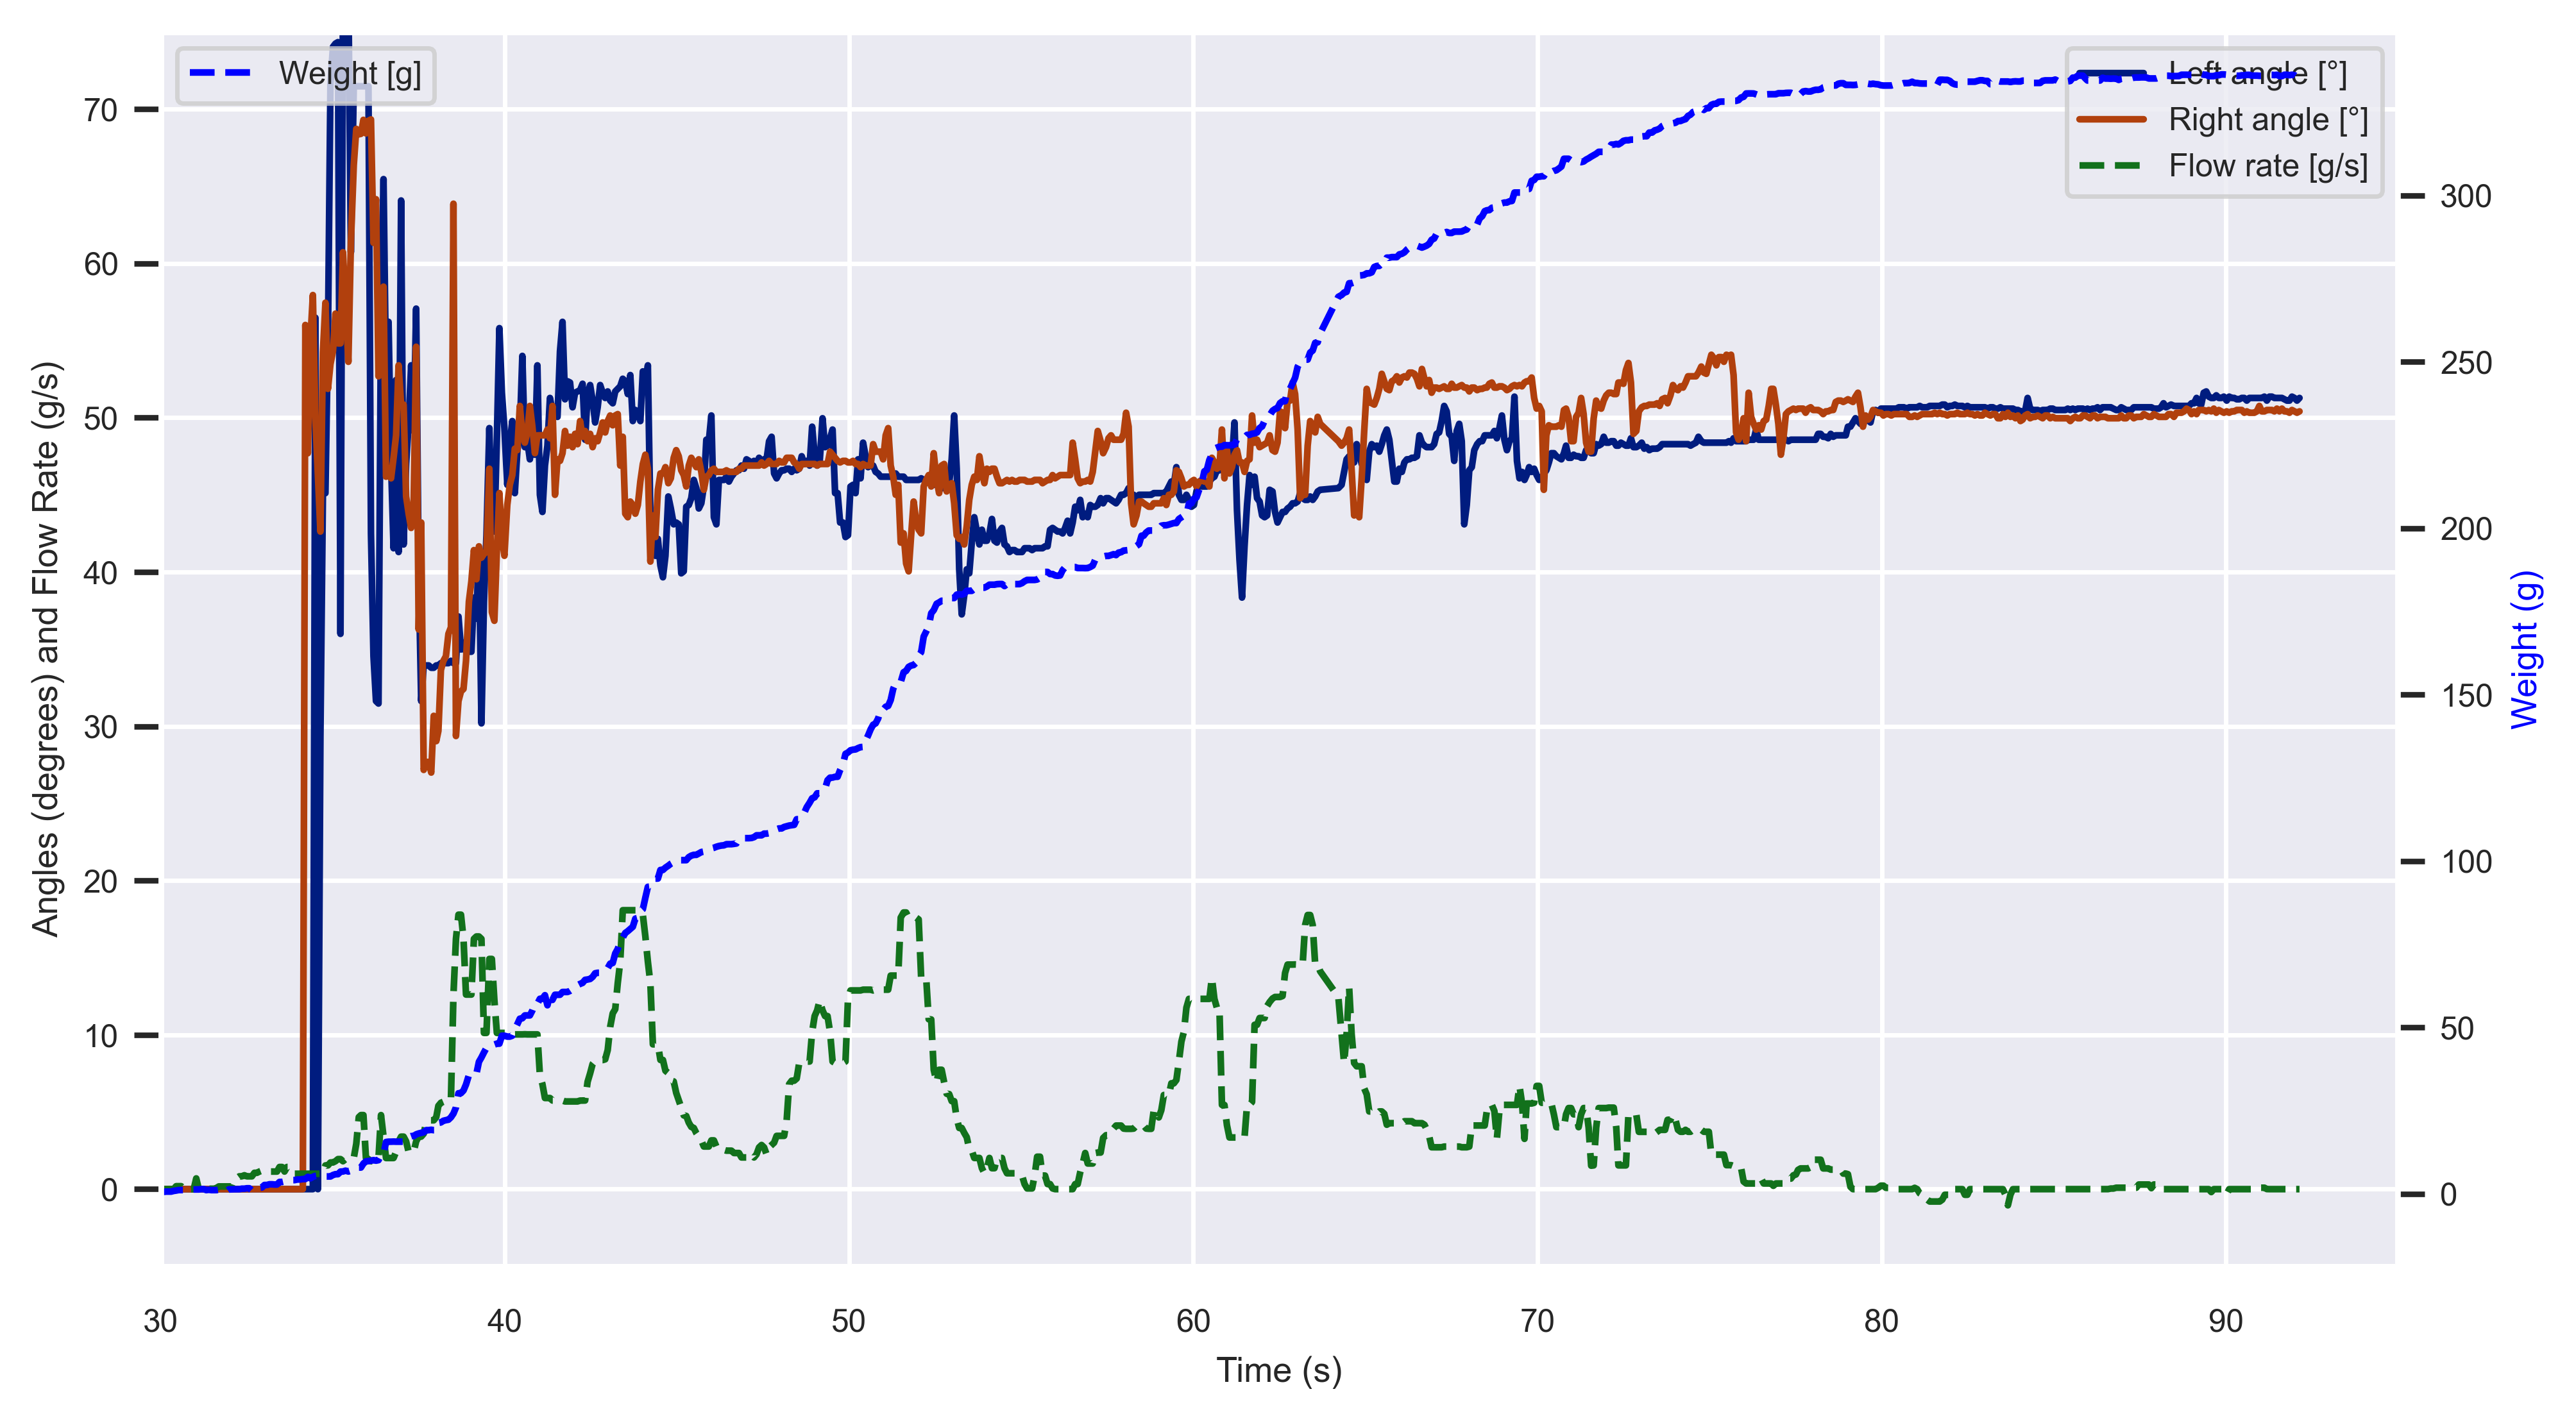

In [ ]:
# Converting 'experiment_id' to string and adding suffix "_exp"

grouped_df_uploaded = new_df.copy()
grouped_df_uploaded.sort_values('experiment_id', inplace=True)

grouped_df_uploaded['experiment_id'] = grouped_df_uploaded['experiment_id'].astype(str) + "_exp"

grouped_df_uploaded = grouped_df_uploaded[grouped_df_uploaded['experiment_id'] == '2_exp']
# Re-plotting with updated 'experiment_id'
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot weight (in green color) on the primary y-axis
# sns.lineplot(x='time_ms', y='weight_g_filtered', data=grouped_df_uploaded, ax=ax1,label='Weight [g]', color='green', palette='Greens', sort=True)
# ax1.set_ylabel('Weight (g)', color='g')
# ax1.tick_params(axis='y', labelcolor='g')
ax1.grid(visible=True)
# Create a second y-axis to plot angles
# ax2 = ax1.twinx()

# Create a second y-axis for the fourth lineplot
ax2 = ax1.twinx()
ax2.grid(visible=False)
# Plotting the first three lineplots on the primary y-axis
sns.lineplot(x='time_ms', y='left_angle', data=grouped_df_uploaded, ax=ax1, label='Left angle [°]', sort=True)
sns.lineplot(x='time_ms', y='right_angle', data=grouped_df_uploaded, ax=ax1, label='Right angle [°]', sort=True)
sns.lineplot(x='time_ms', y='flow_rate_filtered', data=grouped_df_uploaded, ax=ax1, label='Flow rate [g/s]',  palette='Reds', linestyle='--', sort=True)

# Plotting the fourth lineplot on the secondary y-axis
sns.lineplot(x='time_ms', y='weight_g_filtered', data=grouped_df_uploaded, ax=ax2, label='Weight [g]', color='blue', linestyle='--', sort=True)

# Setting labels for y-axes
ax1.set_ylabel('Angles (degrees) and Flow Rate (g/s)')
ax2.set_ylabel('Weight (g)', color='blue')

# Setting label for x-axis
ax1.set_xlabel('Time (s)')

# Adjusting the y-axis limits if necessary
ax1.set(xlim=(30, 95))
# ax1.set(ylim=(0, 75))
# ax2.set(ylim=[0, 400])  # Set appropriate limits for weight

# Adjusting legends
# ... [code for adjusting legends] ...

# Set the original limits for the primary y-axis
ax1.set_ylim(-5, 75)

# Calculate the scaling factor based on the primary axis
primary_range = 75 - (-5)  # (upper limit - lower limit)
primary_positive_ratio = 75 / primary_range

# Get the range of the secondary axis data
secondary_min, secondary_max = ax2.get_ylim()

# Apply the scaling factor to the secondary axis
secondary_range = secondary_max - secondary_min
new_secondary_max = secondary_range * primary_positive_ratio
new_secondary_min = -new_secondary_max * (1 - primary_positive_ratio)

ax2.set_ylim(new_secondary_min, new_secondary_max)

# Rest of your plotting code
# ...

plt.show()


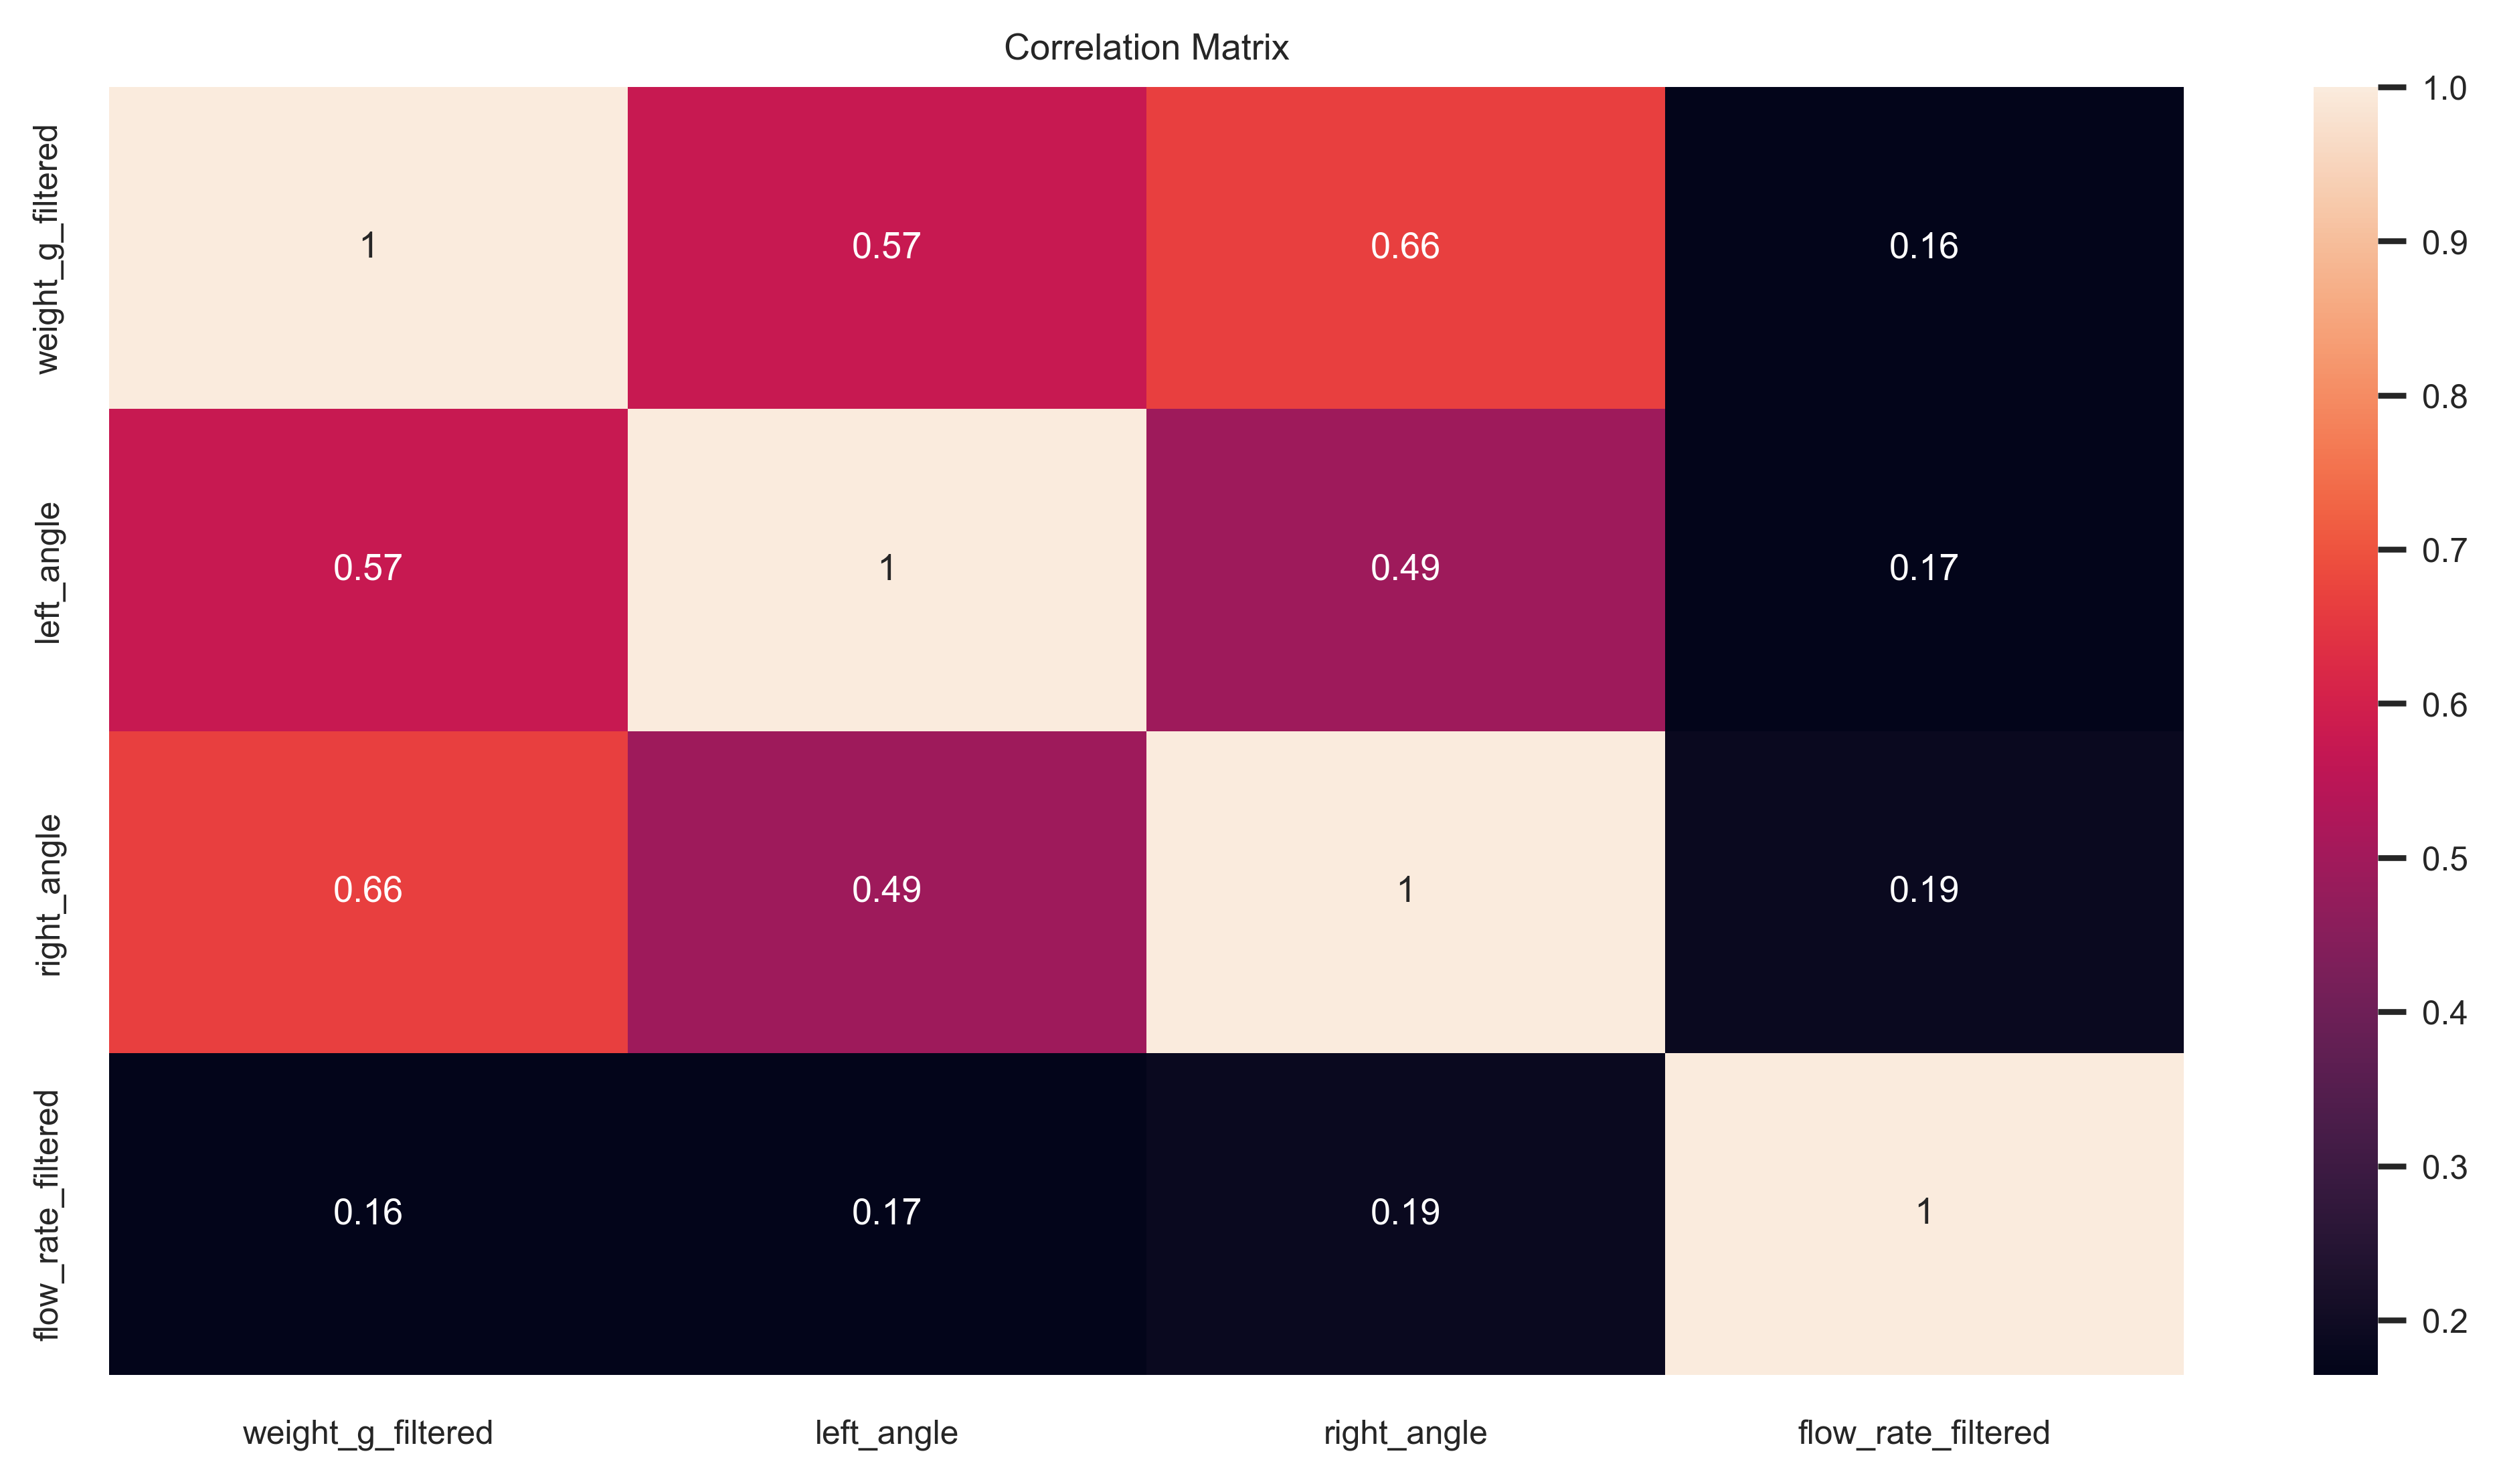

In [ ]:
import scipy.signal as signal

# Filter the dataset to only include relevant columns for correlation analysis
correlation_columns = ['weight_g_filtered', 'left_angle', 'right_angle', 'flow_rate_filtered']
correlation_df = new_df[correlation_columns]

# Remove rows with NaN values from the DataFrame used for correlation analysis
correlation_df_clean = correlation_df.dropna()

# Recalculate the correlation matrix
correlation_matrix_clean = correlation_df_clean.corr(method='spearman')

# Re-plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix_clean, annot=True)#, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("corr.png")
plt.show()

# plt.figure(figsize=(5, 5))
# sns.pairplot(correlation_df)
# plt.title("Paitplot Matrix (NaN values removed)")
# plt.show()



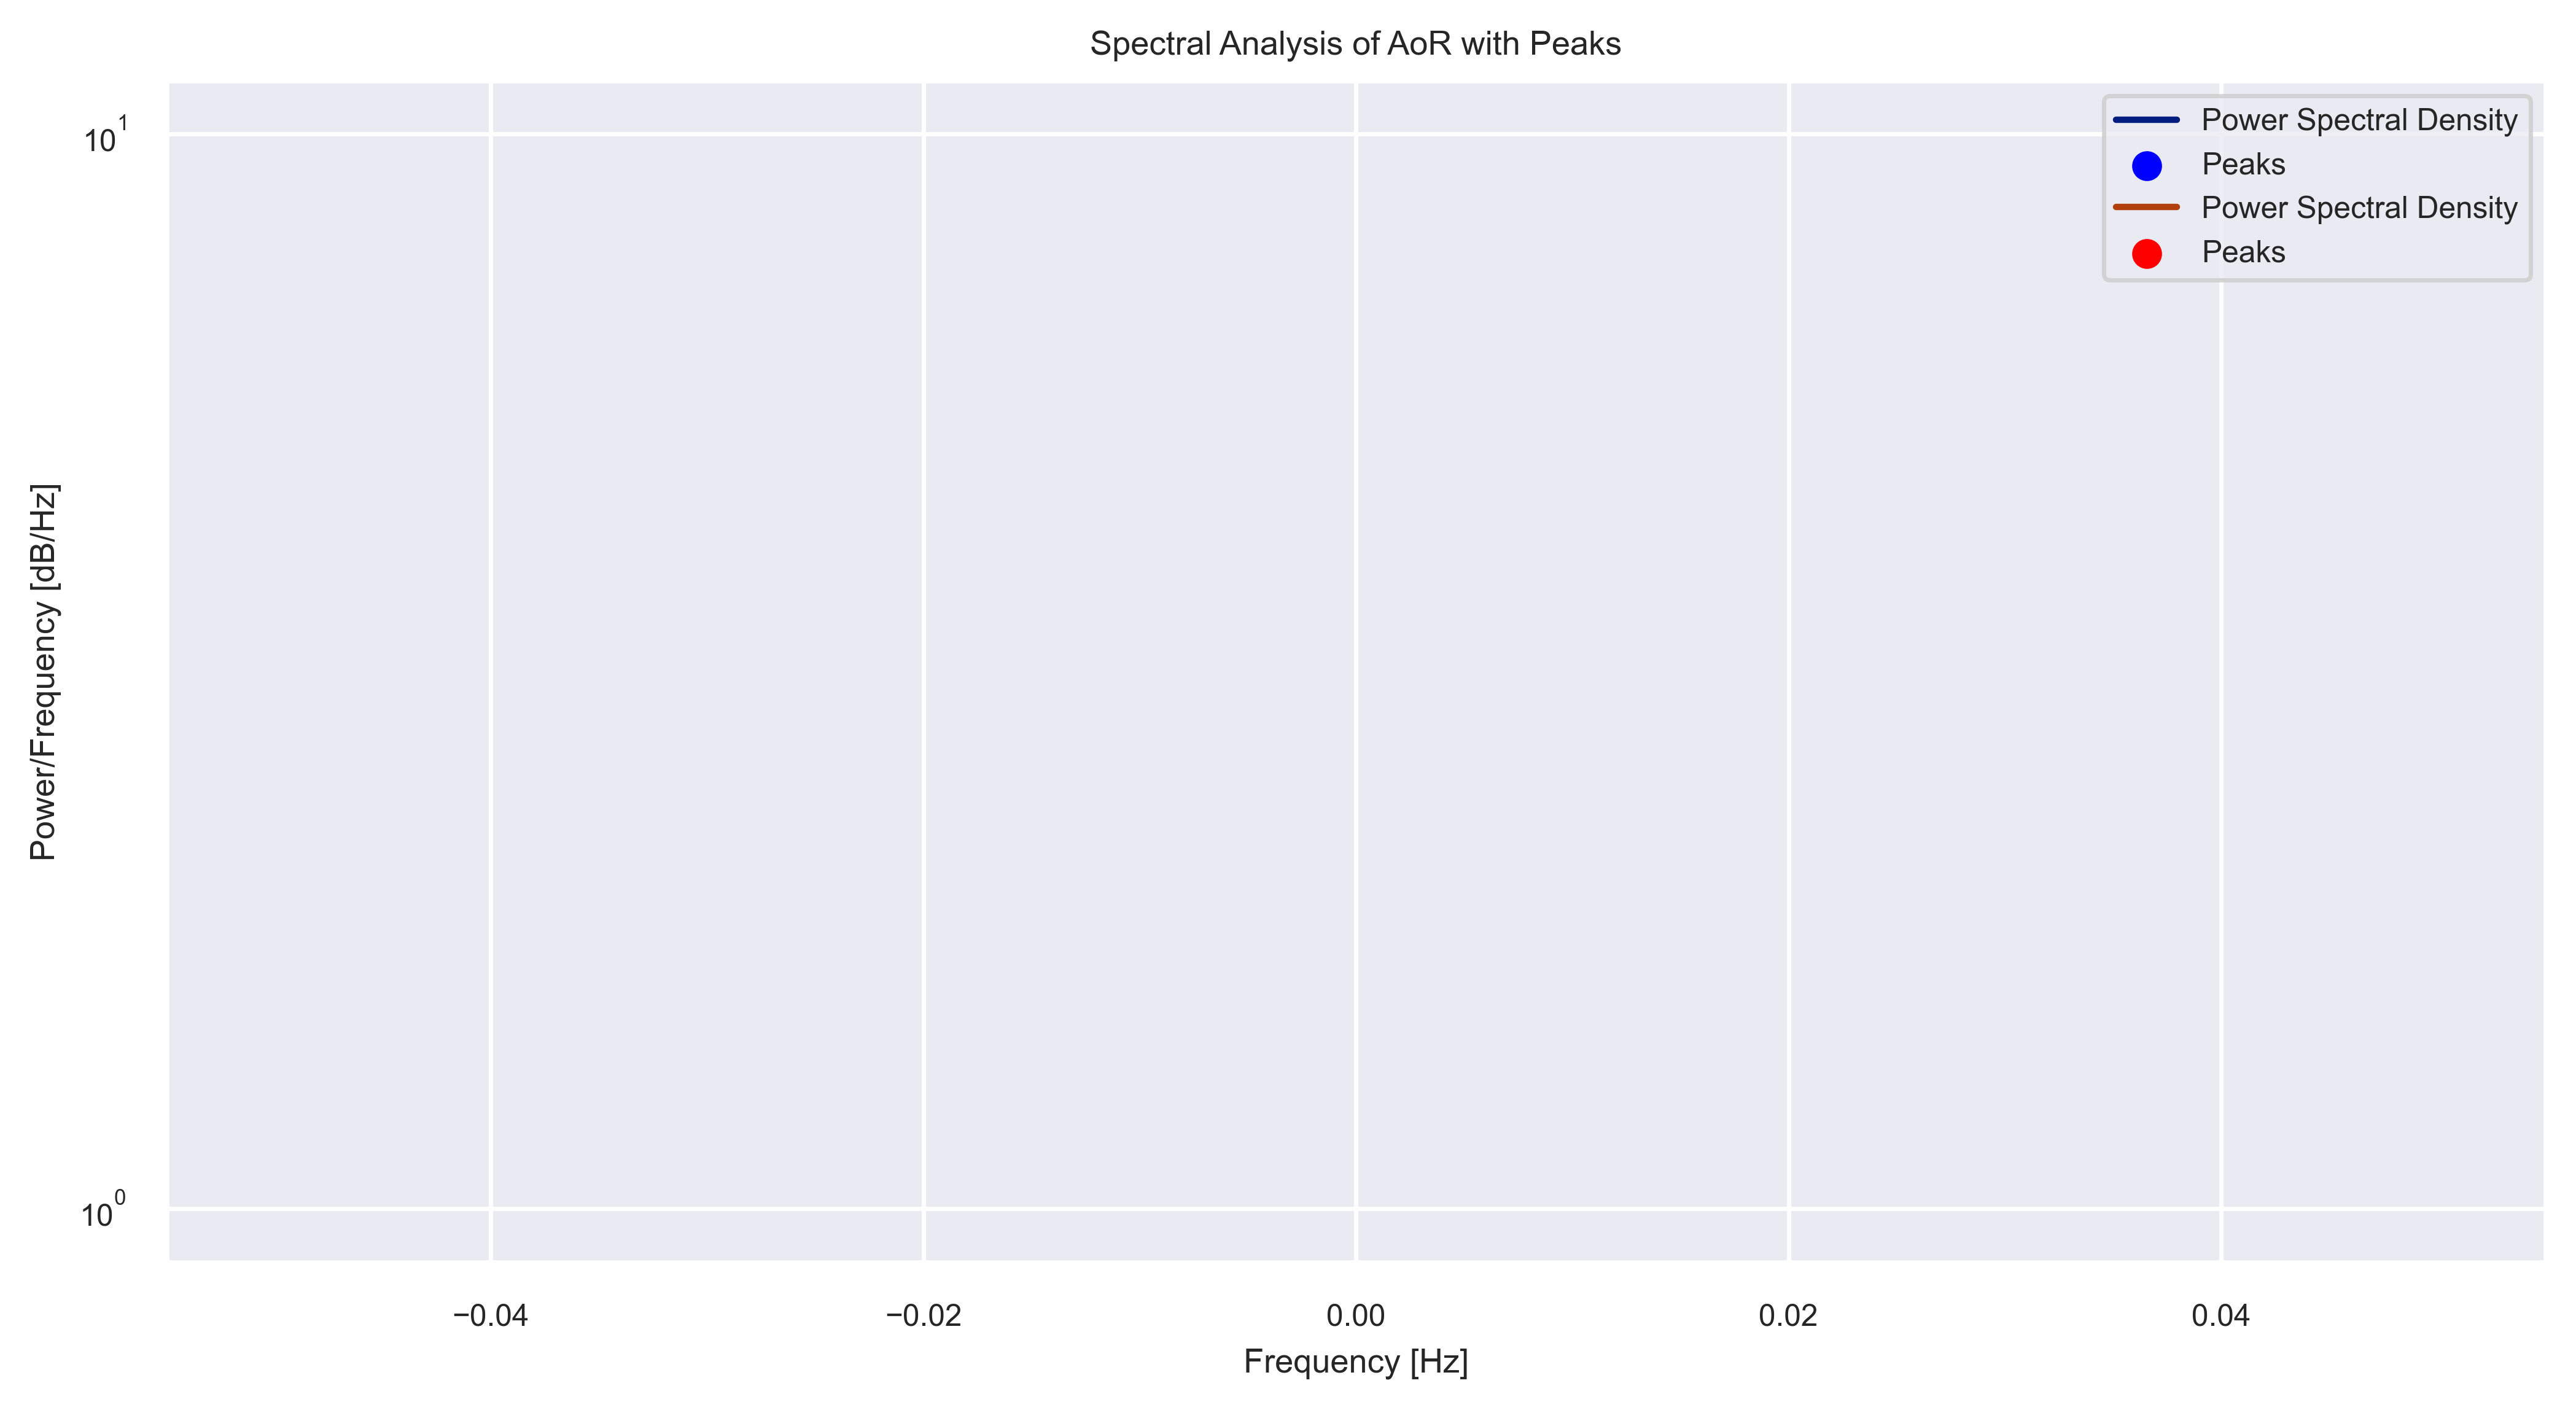

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Perform spectral analysis using Fast Fourier Transform (FFT)
frequencies, fft_values = signal.welch(new_df['left_angle'], fs=30, nperseg=512)  # Using Welch's method, fs = 30 FPS
frequencies2, fft_values2 = signal.welch(new_df['right_angle'], fs=30, nperseg=512)  # Using Welch's method, fs = 30 FPS


# Identify peaks in the spectral data
peak_indices, _ = find_peaks(fft_values, height=1.5)  # The height parameter can be adjusted
peak_indices2, _ = find_peaks(fft_values2, height=1.5)  # The height parameter can be adjusted

# Find the corresponding frequency and power density values
peak_frequencies = frequencies[peak_indices]
peak_values = fft_values[peak_indices]

peak_frequencies2 = frequencies2[peak_indices2]
peak_values2 = fft_values2[peak_indices2]

# Plotting the spectral analysis along with the peaks
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, fft_values, label='Power Spectral Density')
plt.scatter(peak_frequencies, peak_values, color='blue', label='Peaks')

# Annotate the peaks with their frequency values
for i, (freq, val) in enumerate(zip(peak_frequencies, peak_values)):
    plt.annotate(f"{freq:.2f} Hz", (freq, val), textcoords="offset points", xytext=(0,10), ha='center')


plt.semilogy(frequencies2, fft_values2, label='Power Spectral Density')
plt.scatter(peak_frequencies2, peak_values2, color='red', label='Peaks')

# Annotate the peaks with their frequency values
for i, (freq, val) in enumerate(zip(peak_frequencies2, peak_values2)):
    plt.annotate(f"{freq:.2f} Hz", (freq, val), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Spectral Analysis of AoR with Peaks')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [dB/Hz]')
plt.legend()
plt.show()


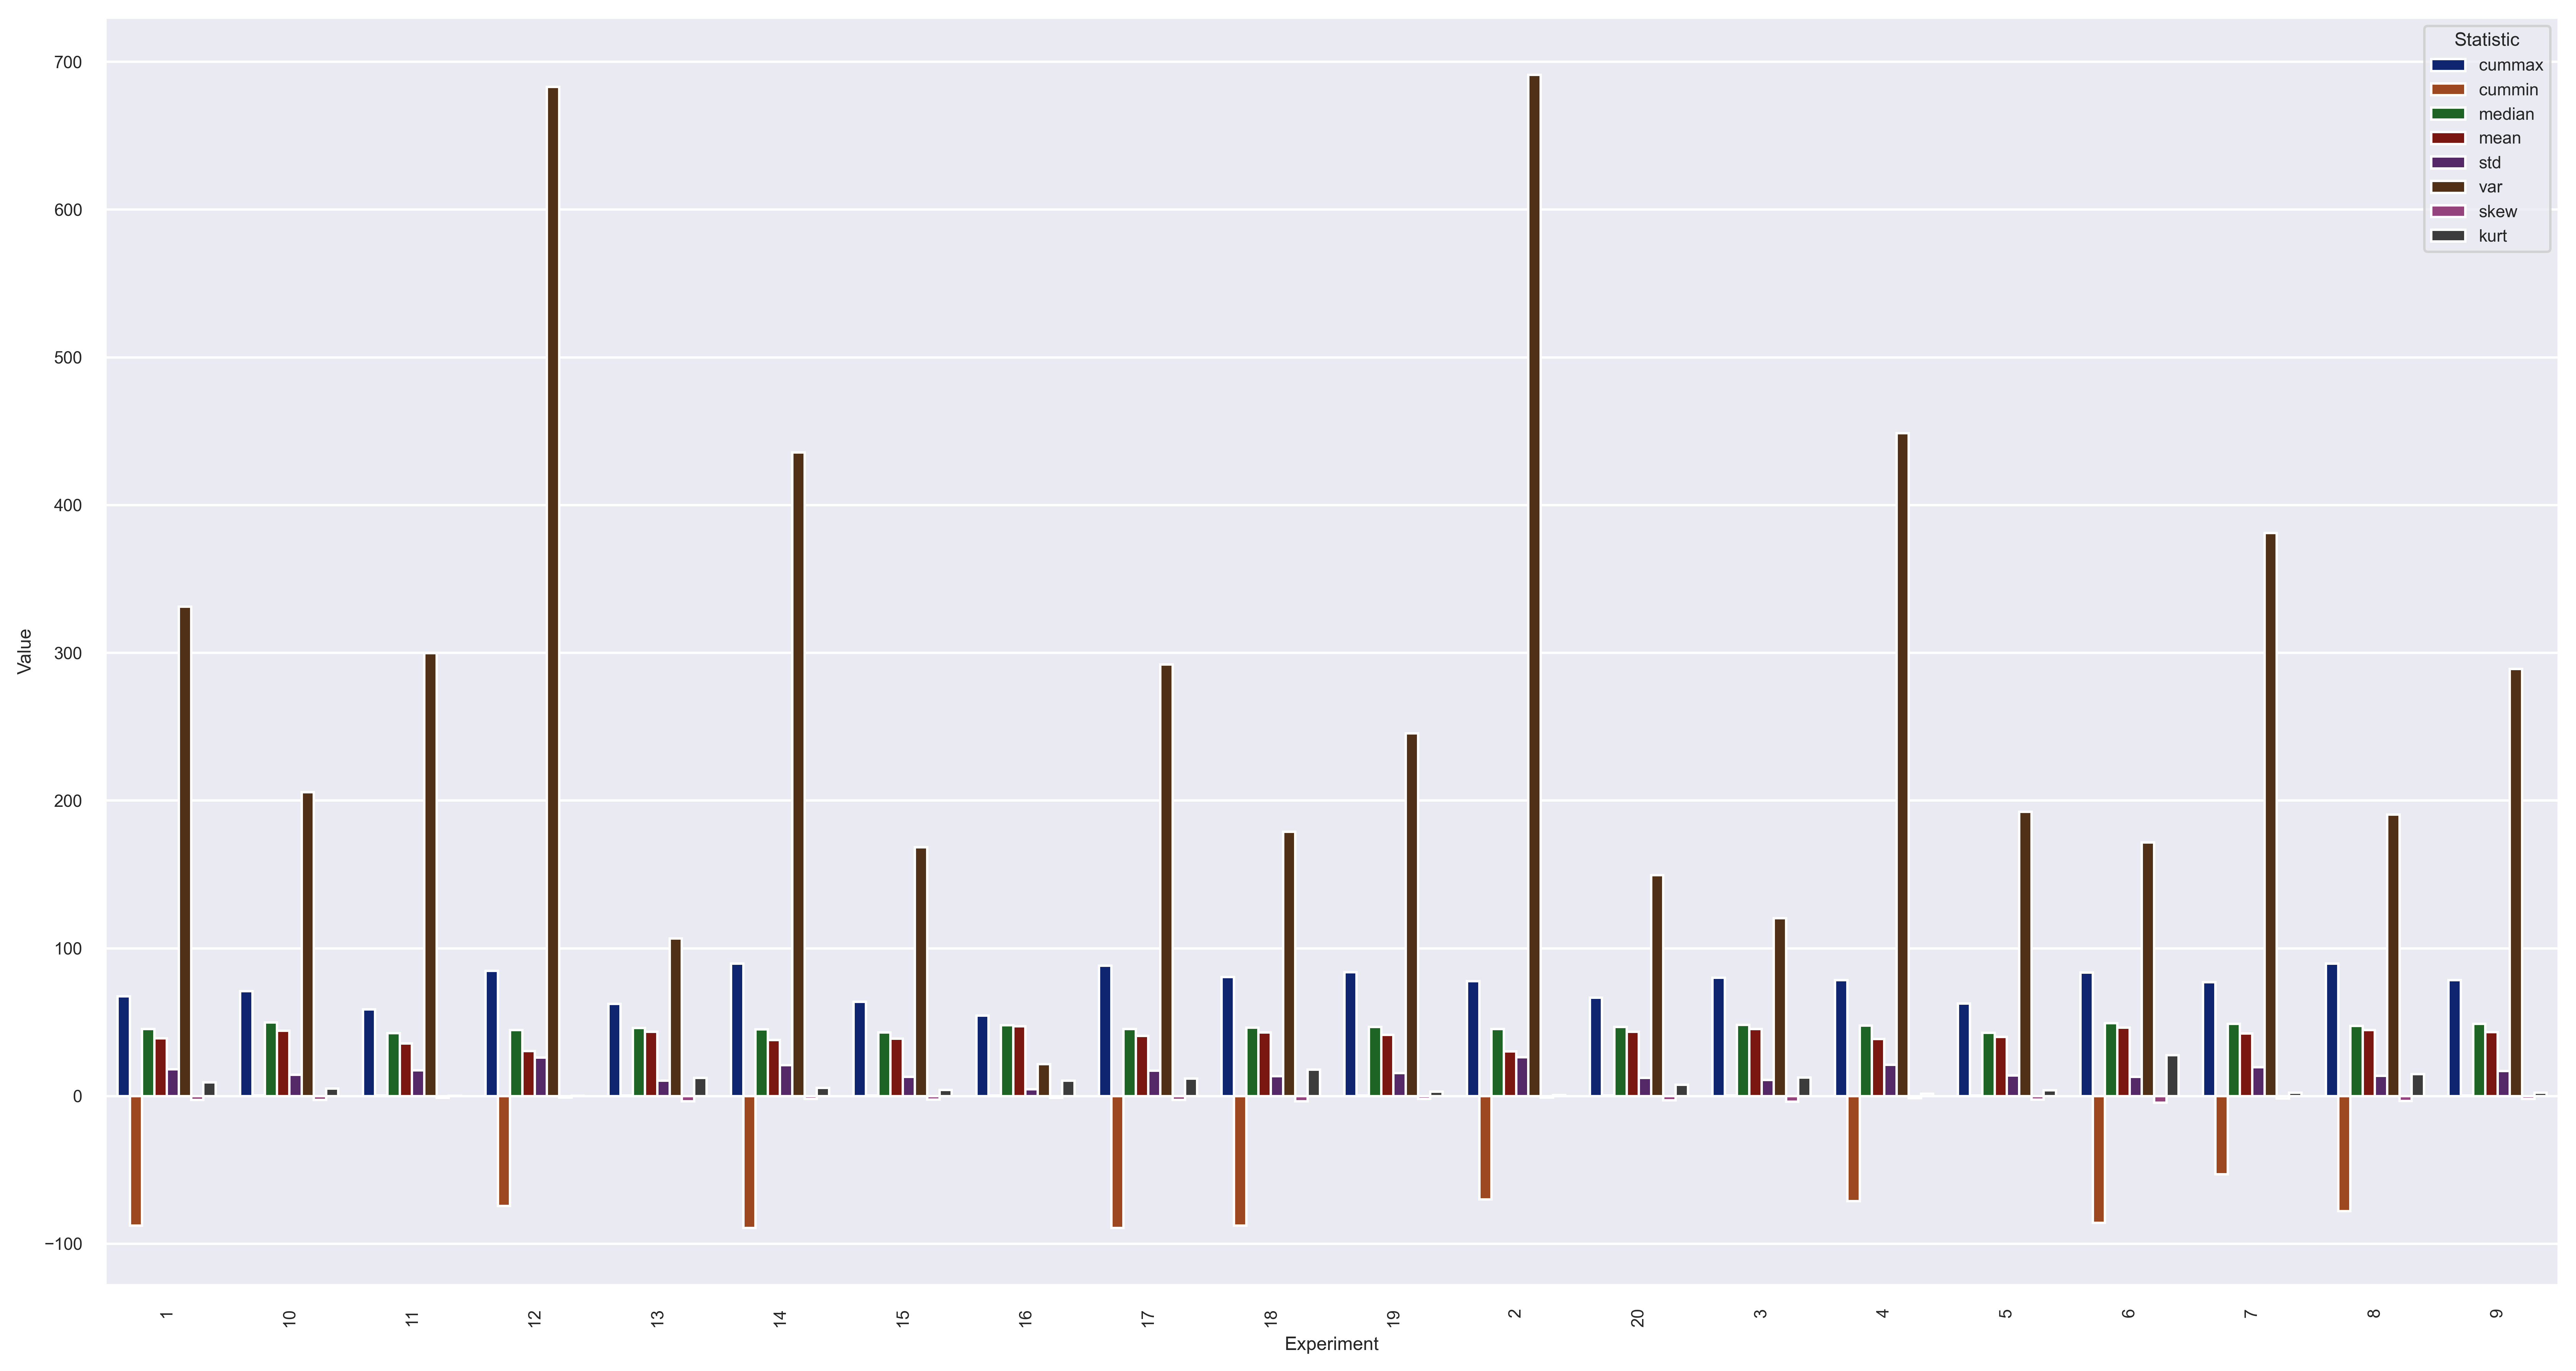

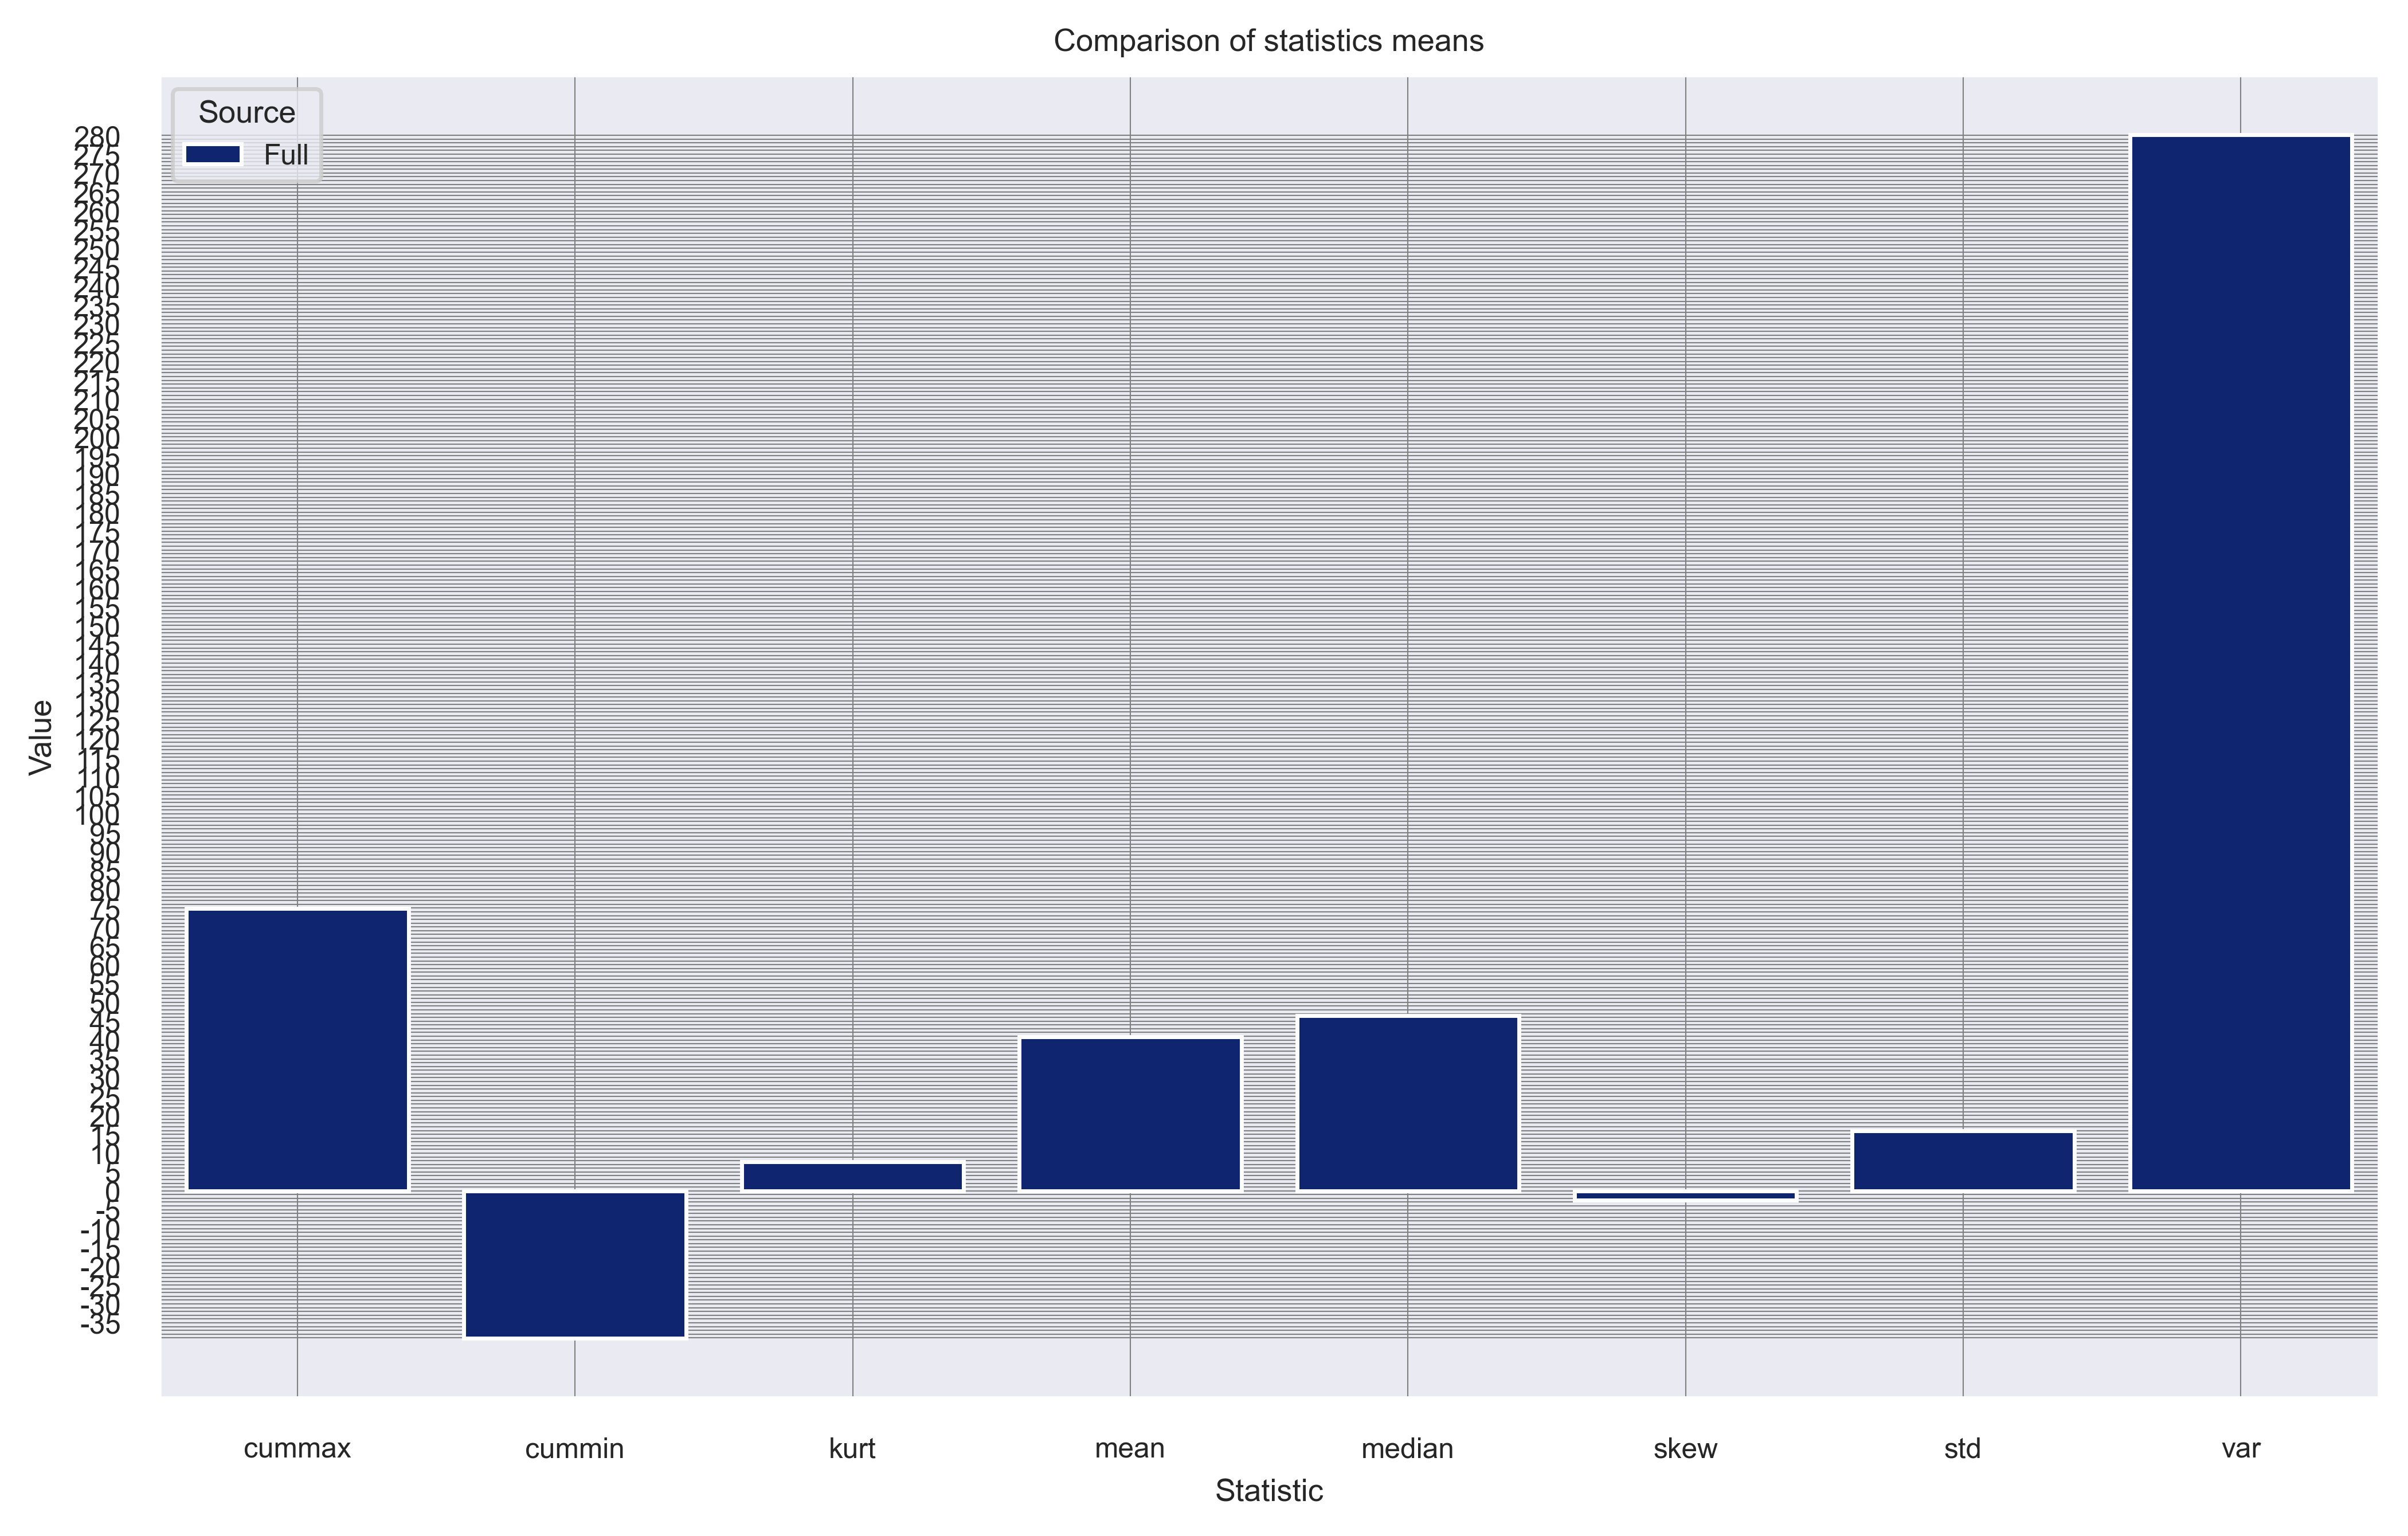

,Experiment,Statistic,Value,Source


In [ ]:
import seaborn as sns

# Convert the nested dictionary into a DataFrame
df = pd.DataFrame(statistics)

# Unwrap single-element lists
df = df.applymap(lambda x: x[0])

# Transpose the DataFrame so that each row corresponds to a dataframe
df = df.transpose()

# Reset the DataFrame index
df_reset = df.reset_index()

# Melt the DataFrame to long format
df_melt = df_reset.melt(id_vars='index')

# Rename the columns
df_melt.columns = ['Experiment', 'Statistic', 'Value']
mask = df_melt['Experiment'].str.contains("L")
df_sifted = df_melt[mask]
df_full = df_melt[~mask]
df_sifted['Source'] = 'Sifted'
df_full['Source'] = 'Full'
df_comb = pd.concat([df_sifted, df_full])

# Create the barplot
plt.figure(figsize=(15,8))
sns.barplot(data=df_melt, x='Experiment', y='Value', hue='Statistic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
mean_statistics_sifted = df_sifted.groupby('Statistic')['Value'].mean().reset_index()
mean_statistics_full = df_full.groupby('Statistic')['Value'].mean().reset_index()
mean_statistics_sifted['Source'] = 'Sifted'
mean_statistics_full['Source'] = 'Full'
combined_df = pd.concat([mean_statistics_full, mean_statistics_sifted])
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Statistic', y='Value', hue='Source')
plt.title('Comparison of statistics means')
plt.grid(True, linewidth=0.3, color='gray', linestyle='-')
yticks = np.arange(int(min(combined_df['Value'])), int(max(combined_df['Value']))+1, 1)
plt.yticks(yticks)

# create labels for every fifth ytick, leave others blank
yticklabels = [str(y) if y % 5 == 0 else '' for y in yticks]
plt.gca().set_yticklabels(yticklabels)
plt.show()

df_sifted.tail()


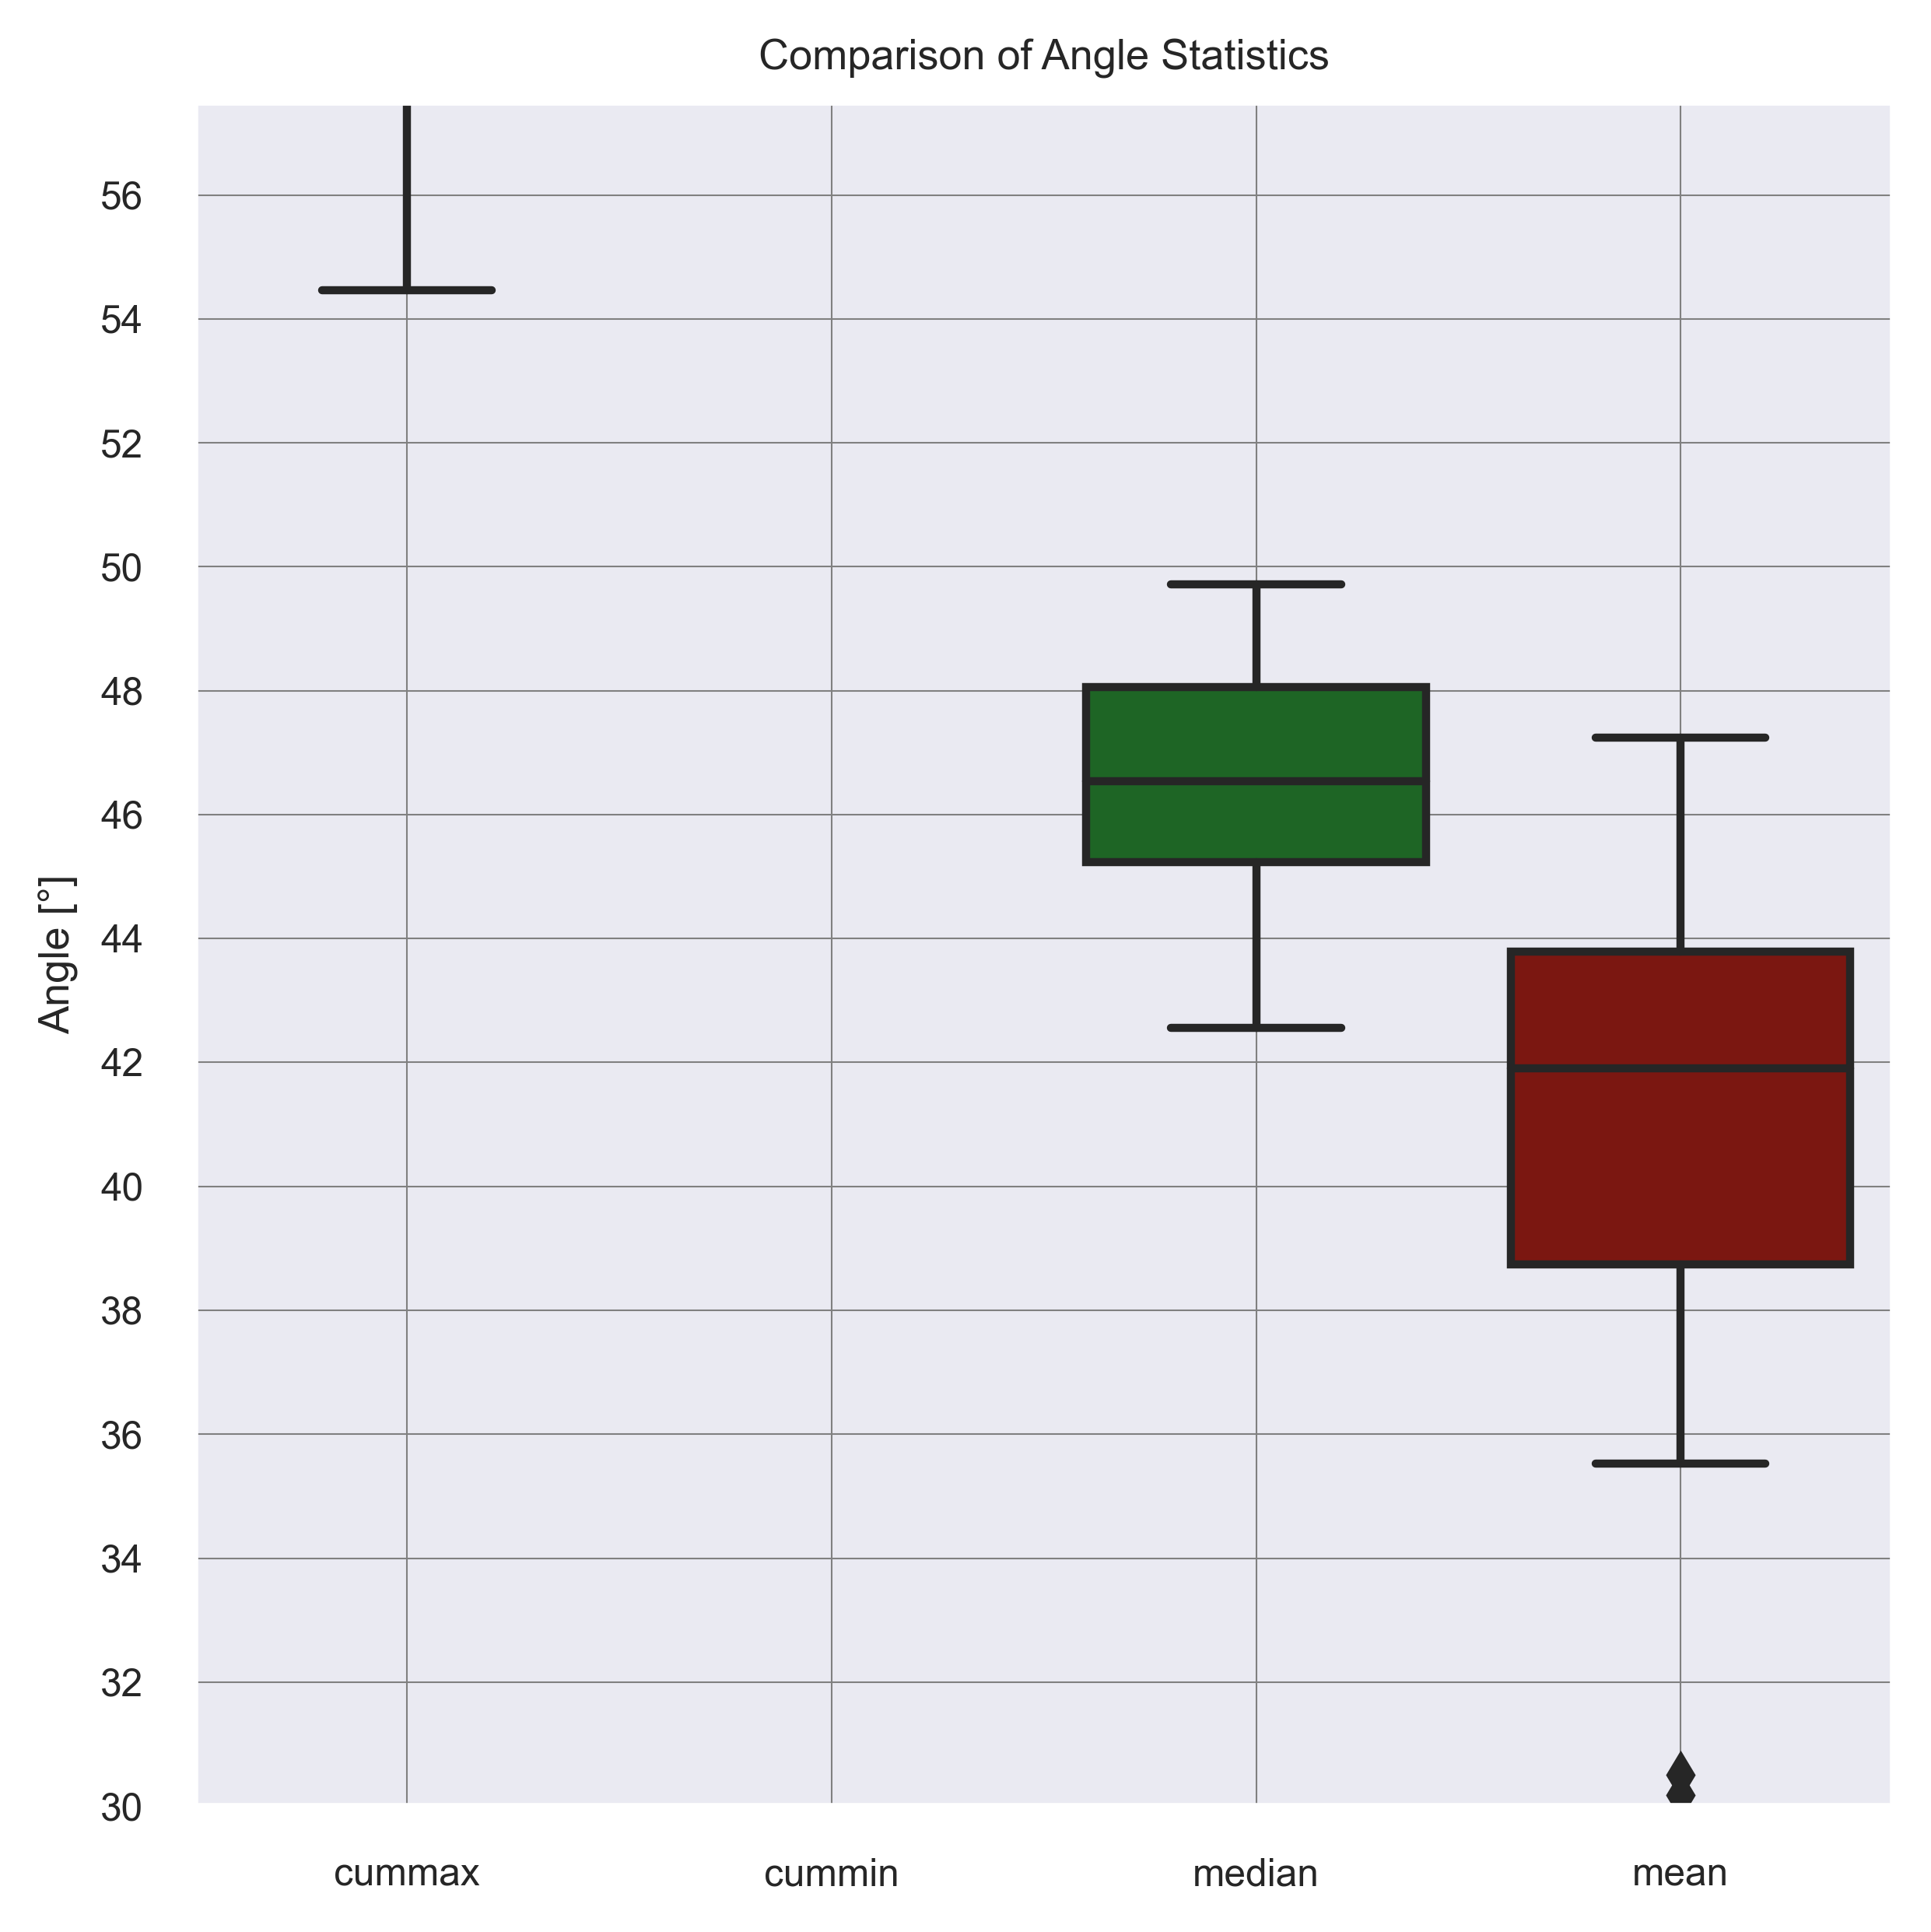

In [ ]:
plt.figure(figsize=(5,5))

df_cut = df_comb[df_comb['Statistic'].isin(['cummin', 'median', 'mean', 'cummax'])]

sns.boxplot(x='Statistic', y='Value', data=df_cut)
yticks = np.arange(-2, 65, 2)
plt.yticks(yticks)
# create labels for every fifth ytick, leave others blank
yticklabels = [str(y) if y % 2 == 0 else '' for y in yticks]
plt.gca().set_yticklabels(yticklabels)

# Set tick width depending on if the tick is even or odd
for i, tick in enumerate(plt.gca().yaxis.get_major_ticks()):
    if i % 2 == 0:  # Even ticks
        tick.tick1line.set_markersize(4)  # Make even ticks larger
    else:  # Odd ticks
        tick.tick1line.set_markersize(2)  # Make odd ticks smaller
plt.ylim(30, 57.5)
plt.ylabel("Angle [°]")
plt.xlabel("")
plt.title('Comparison of Angle Statistics')
plt.grid(True, linewidth=0.3, color='gray', linestyle='-')
plt.tight_layout()
plt.savefig("angle_stats.png")
plt.show()

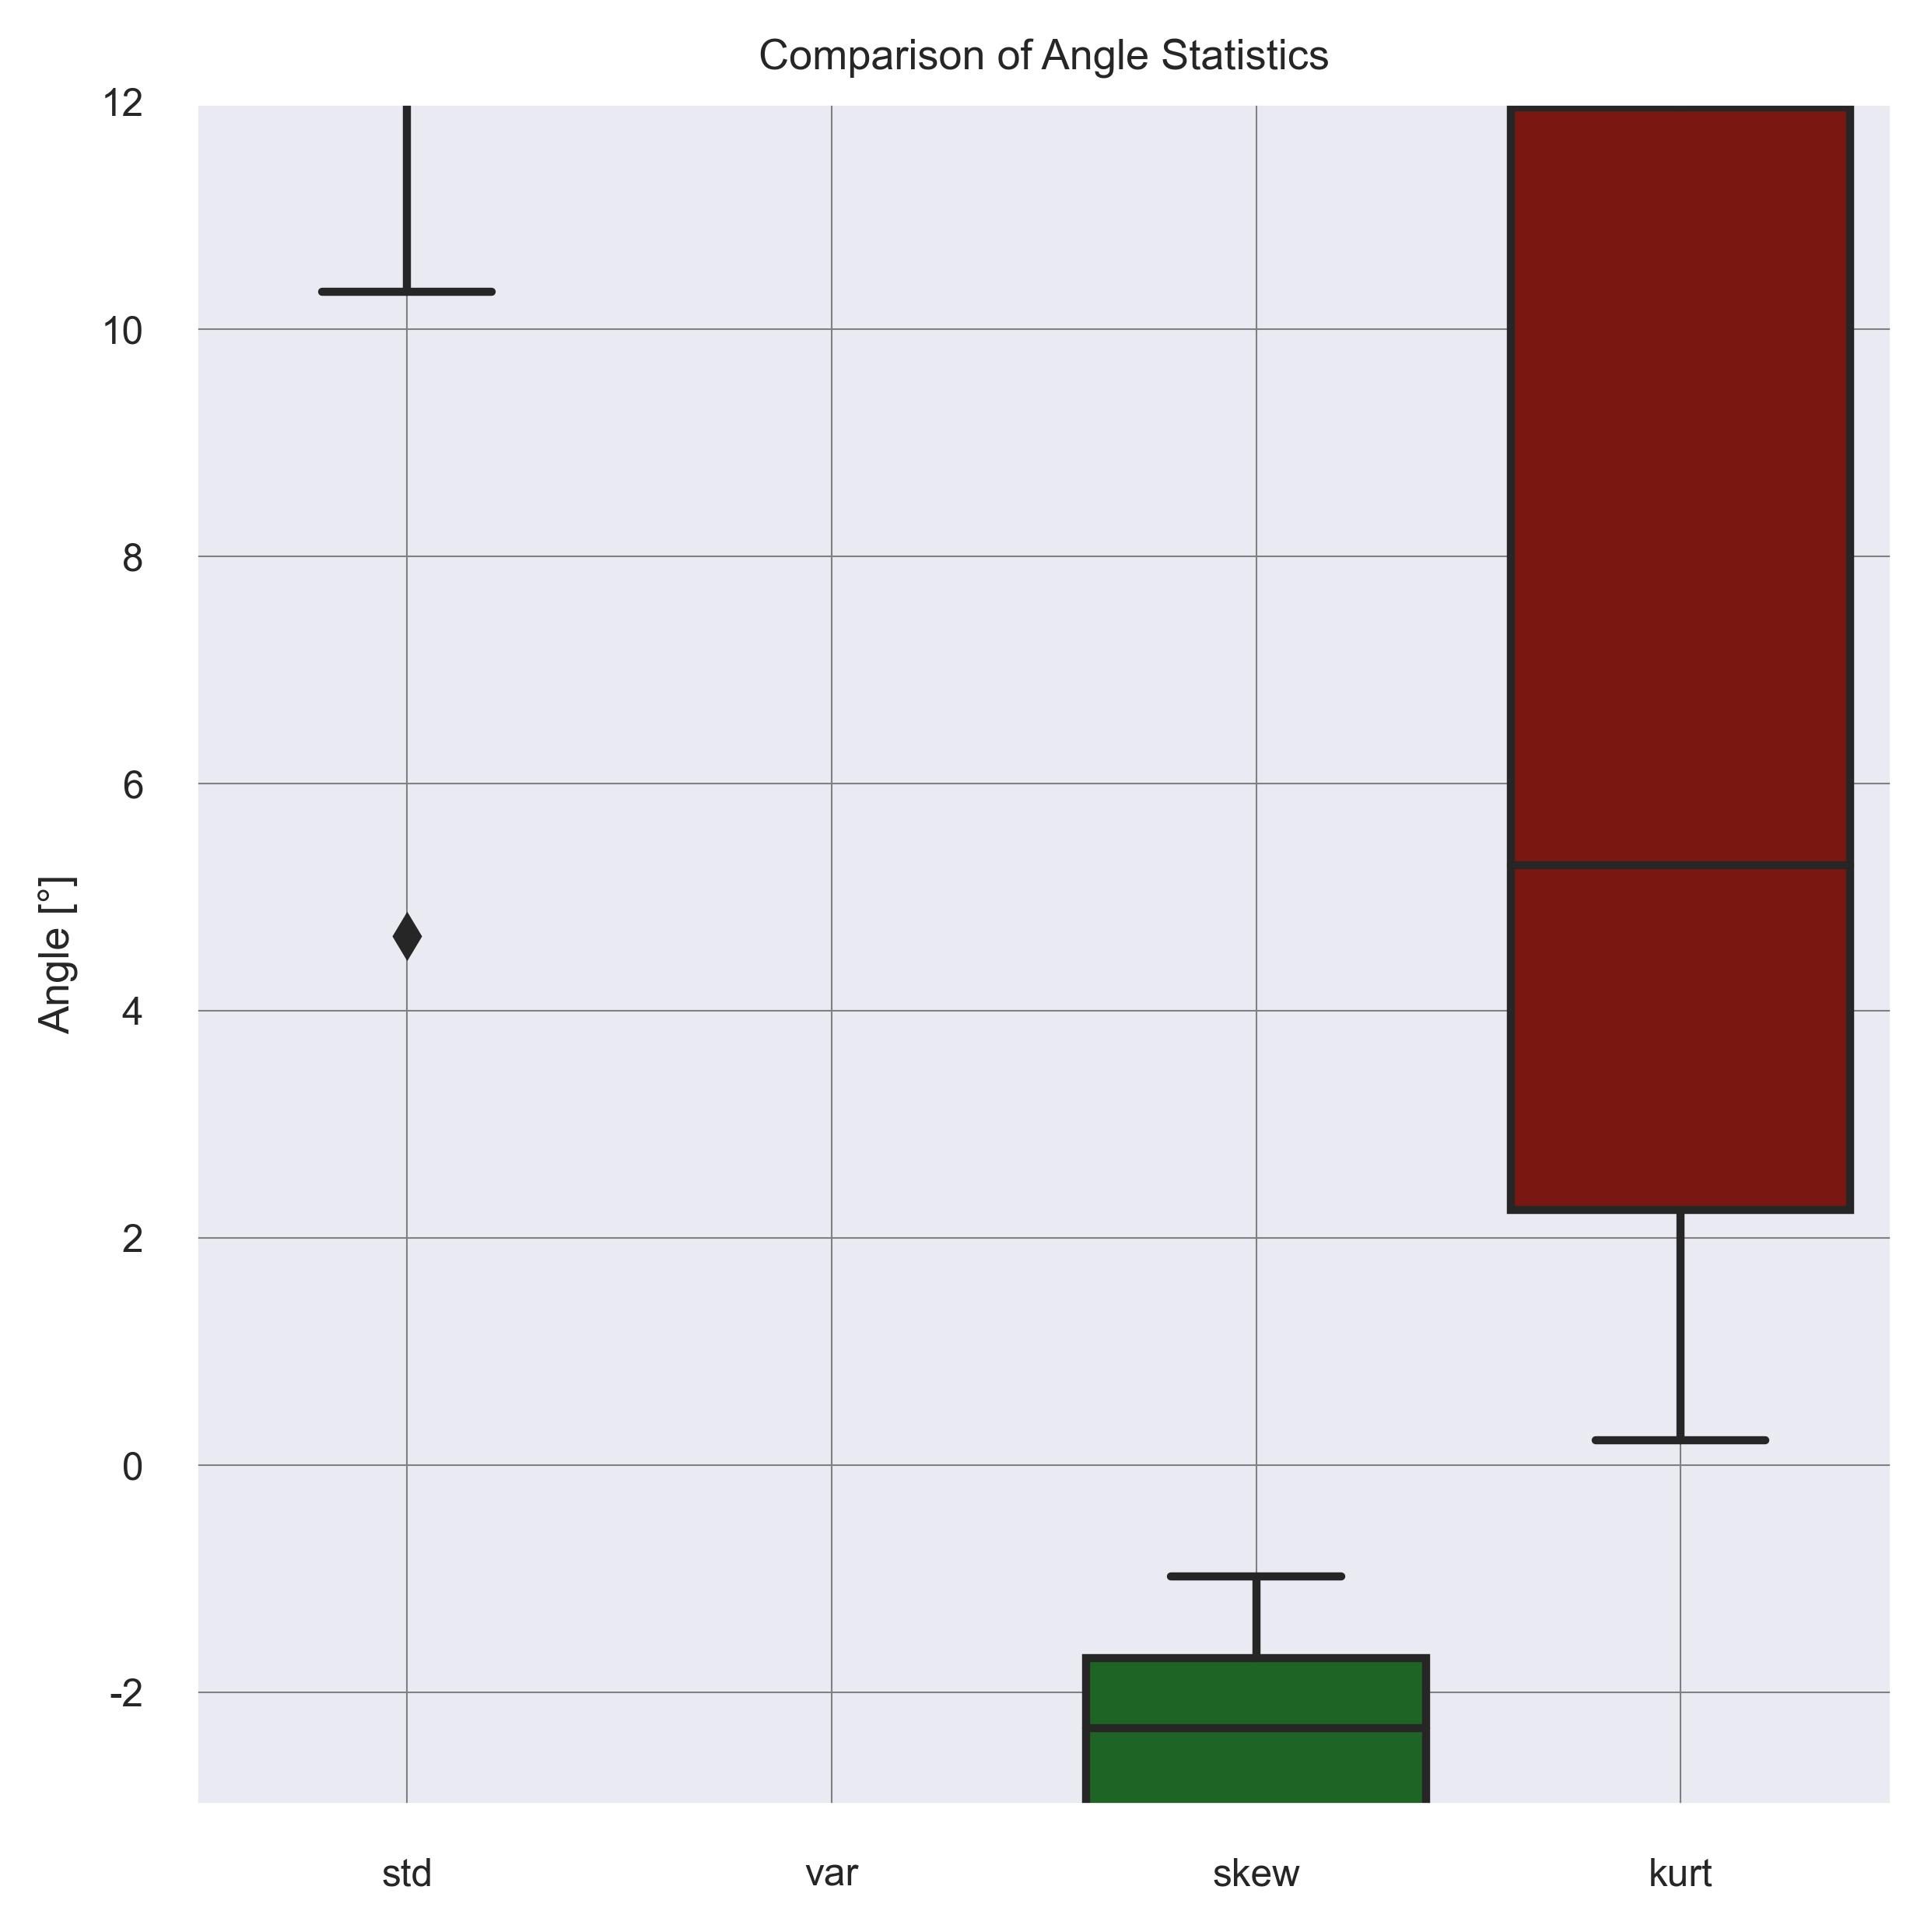

In [ ]:
plt.figure(figsize=(5,5))

df_cut = df_comb[df_comb['Statistic'].isin(['std', 'var', 'kurt', 'skew'])]

sns.boxplot(x='Statistic', y='Value', data=df_cut)
yticks = np.arange(-2, 65, 2)
plt.yticks(yticks)
# create labels for every fifth ytick, leave others blank
yticklabels = [str(y) if y % 2 == 0 else '' for y in yticks]
plt.gca().set_yticklabels(yticklabels)

# Set tick width depending on if the tick is even or odd
for i, tick in enumerate(plt.gca().yaxis.get_major_ticks()):
    if i % 2 == 0:  # Even ticks
        tick.tick1line.set_markersize(4)  # Make even ticks larger
    else:  # Odd ticks
        tick.tick1line.set_markersize(2)  # Make odd ticks smaller
plt.ylim(-3, 12)
plt.ylabel("Angle [°]")
plt.xlabel("")
plt.title('Comparison of Angle Statistics')
plt.grid(True, linewidth=0.3, color='gray', linestyle='-')
plt.tight_layout()
plt.savefig("angle_stats2.png")
plt.show()

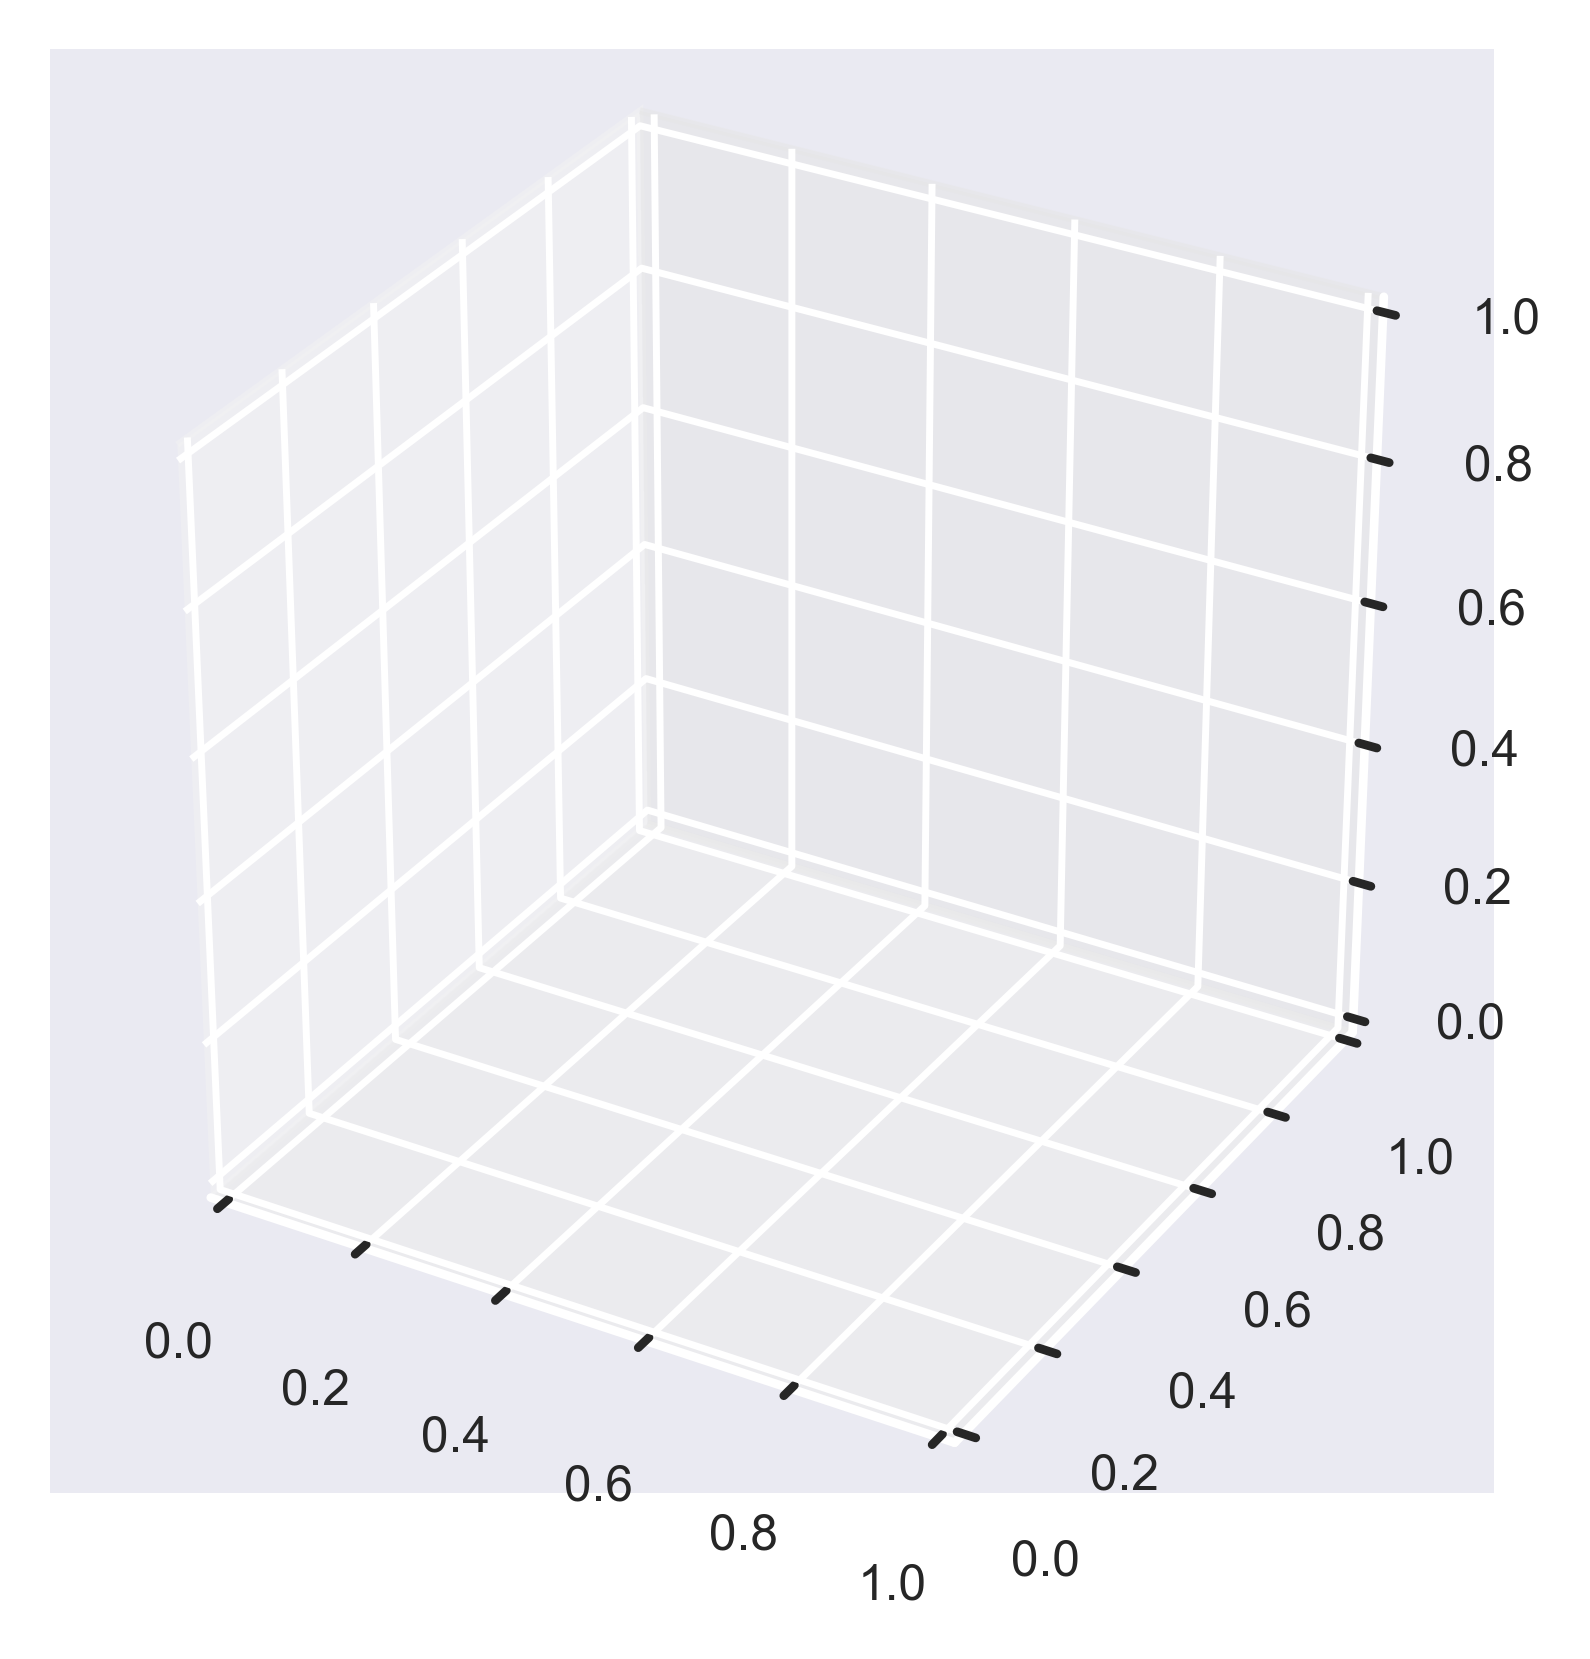

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

# Define the dimensions
height = 1  # in meters

# Create the z-values for the cylinder
z = np.linspace(0, height, 50)

# Create the 3D plot for the rotating cylinder (pipe)
def plot_cylinder(ax, radius, z, color, alpha=1):
    phi = np.linspace(0, 2 * np.pi, 50)
    x = radius * np.cos(phi)
    y = radius * np.sin(phi)
    ax.plot_surface(x[None, :], y[None, :], z[:, None], color=color, alpha=alpha)

# Animation function
def animate(i):
    ax.cla()
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, height])
    ax.set_title("Rotating Hollow Cylinder (3D View)")
    
    plot_cylinder(ax, outer_radius, z, 'b', alpha=0.5)
    plot_cylinder(ax, inner_radius, z, 'w', alpha=1)
    
    ax.view_init(elev=20, azim=i)
    
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, 360, 2), interval=50)

plt.show()


In [ ]:
df_melted = pd.melt(df_comb, id_vars=['Experiment', 'sifted'], 
                    value_vars=['Angle_min', 'Angle_mean','Angle_max'])

plt.figure(figsize=(10, 6))

# Create the violinplot
sns.boxplot(x='variable', y='value', hue='sifted', data=df_comb)
plt.grid(axis='y')
plt.ylim(30, 55)
plt.title('Comparison of Angle Statistics')
plt.tight_layout()
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['sifted']"

In [ ]:
df_by_experiment = new_df.groupby('experiment_id')
print(type(df_by_experiment))
# df_by_experiment["Filtered Left"].describe()
result = df_by_experiment.describe()

# df_med_by_experiment["Tilt"]= df_by_experiment["Tilt"].median()
# df_med_by_experiment.head()
# result["Filtered Right"].agg(['min', 'max', 'std'])
# Flatten the column hierarchy
result.columns = ['_'.join(col).strip() for col in result.columns.values]
# result.drop(level = 1, index="Left Angle", axis=columns)
# Now, you can select the columns you need
final_df = result[[col for col in result.columns if 'min' in col or 'max' in col or 'std' in col or 'mean' in col]]
final_df.reset_index()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,experiment_id,weight_g_x_mean,weight_g_x_std,weight_g_x_min,weight_g_x_max,time_ms_mean,time_ms_std,time_ms_min,time_ms_max,weight_g_y_mean,...,Column_Integral_min,Column_Integral_max,Tilt_mean,Tilt_std,Tilt_min,Tilt_max,below_threshold_diff_mean,below_threshold_diff_std,below_threshold_diff_min,below_threshold_diff_max
0,1,340.414763,5.503888,330.283907,347.600895,78.432349,3.793603,71.930388,84.927750,340.414763,...,0.000000e+00,0.429847,1.205086,1.056962,-0.392891,3.004311,0.005587,0.074744,0.0,1.0
1,10,142.883719,54.215510,-293.350652,365.088928,40.160735,14.947958,14.357413,65.892355,142.883719,...,0.000000e+00,0.583971,2.011163,3.848306,-11.943369,9.201068,0.000000,0.053452,-1.0,1.0
2,11,161.279845,51.281166,-289.459817,266.970422,46.383828,6.716755,34.819819,57.968437,161.279845,...,3.631084e-03,1.103447,-2.992901,4.843348,-11.328832,6.915224,0.000000,0.079430,-1.0,1.0
3,12,306.049794,58.474901,-205.707206,337.401959,76.291394,9.230086,60.089281,92.140454,306.049794,...,0.000000e+00,0.544812,-3.047988,1.633643,-10.700501,0.945004,0.002309,0.048057,0.0,1.0
4,13,321.962042,114.611821,-406.908672,500.436920,103.464433,44.201163,26.019588,179.849361,321.962042,...,1.604972e-07,0.564403,-4.093217,2.738421,-14.015341,6.235634,0.000490,0.022130,0.0,1.0
5,14,352.284152,75.040823,211.165532,447.773821,46.654854,7.306782,34.065272,59.350334,352.284152,...,4.420603e-03,0.737774,-4.752690,2.498633,-12.332979,1.134056,0.002890,0.053760,0.0,1.0
6,15,163.465494,13.823690,-262.643381,175.474541,86.505206,24.262781,45.622053,128.108905,163.465494,...,0.000000e+00,0.427488,-4.567694,1.474845,-12.804781,-0.262291,0.000923,0.030373,0.0,1.0
7,16,35.496872,64.953477,-433.571188,171.120581,18.576187,10.096436,0.746456,37.036045,35.496872,...,0.000000e+00,7.562232,-4.456224,5.382606,-26.863759,45.510551,0.000000,0.069089,-1.0,1.0
8,17,378.117750,23.500587,331.750081,411.345528,97.820558,8.288772,84.875172,111.943229,378.117750,...,0.000000e+00,0.511106,-0.542028,1.436262,-4.480945,4.024872,0.003115,0.055815,0.0,1.0
9,18,154.033327,48.445030,-490.990595,253.266265,81.572794,20.755466,45.737725,117.623165,154.033327,...,0.000000e+00,0.855190,-0.831415,2.800316,-6.952176,5.747142,0.000000,0.045175,-1.0,1.0


In [ ]:
final_single_df.tail()

""


In [ ]:

# fig, ax1 = plt.subplots(figsize=(15, 8))

# # Plot weight (in green color) on the primary y-axis
# sns.lineplot(x='time_ms', y='weight_g_filtered', data=new_df, ax=ax1, color='green', label='Weight')
# ax1.set_xlabel('Time (ms)')
# ax1.set_ylabel('Weight (g)', color='g')
# ax1.tick_params(axis='y', labelcolor='g')

# # Create a second y-axis to plot angles
# ax2 = ax1.twinx()
# sns.lineplot(x='time_ms', y='left_angle_1', data=new_df, ax=ax2, label='Left Angle 1')
# sns.lineplot(x='time_ms', y='left_angle_2', data=new_df, ax=ax2, label='Left Angle 2')
# sns.lineplot(x='time_ms', y='right_angle_1', data=new_df, ax=ax2, label='Right Angle 1')
# sns.lineplot(x='time_ms', y='right_angle_2', data=new_df, ax=ax2, label='Right Angle 2')

# # Plot flow rate on the second y-axis
# sns.lineplot(x='time_ms', y='flow_rate_filtered', data=new_df, ax=ax2, label='Flow Rate', linestyle='--')

# ax2.set_ylabel('Angles (degrees) and Flow Rate (g/ms)')
# ax2.legend(loc="upper left", bbox_to_anchor=(0,1))

# plt.title('Filtered Weight, Flipped Angles, and Flow Rate vs Time')
# plt.show()



In [ ]:
# final_single_df.to_csv('final_single_df.csv', index=False)


In [ ]:
pandas_version = pd.__version__
seaborn_version = sns.__version__

pandas_version, seaborn_version

In [ ]:
# Reinitialize an empty DataFrame to store summary statistics using pd.concat
from scipy import stats
summary_stats_filtered_concat = pd.DataFrame()

# List to hold individual summary dataframes
summary_dataframes = []
filtered_df = new_df[new_df['time_s'] > 0]

# Iterate through each unique experiment to calculate statistics
for exp_id in filtered_df['experiment_id'].unique():
    exp_data = filtered_df[filtered_df['experiment_id'] == exp_id]
    
    # Initialize a list to store summary dictionaries for this experiment
    summary_dicts = []
    
    # Calculate statistics for left and right angles
    for angle_type in ['left_angle', 'right_angle']:
        min_angle = exp_data[angle_type].min()
        max_angle = exp_data[angle_type].max()
        std_dev = exp_data[angle_type].std()
        variance = exp_data[angle_type].var()
        skewness = stats.skew(exp_data[angle_type].dropna())
        kurt = stats.kurtosis(exp_data[angle_type].dropna())
        
        # Create a dictionary for these statistics
        summary_dict = {
            'experiment_id': exp_id,
            'angle_type': angle_type,
            'min_angle': min_angle,
            'max_angle': max_angle,
            'std_dev': std_dev,
            'variance': variance,
            'skewness': skewness,
            'kurtosis': kurt
        }
        
        # Add the summary dictionary to the list
        summary_dicts.append(summary_dict)
    
    # Convert the list of dictionaries to a DataFrame
    temp_summary = pd.DataFrame(summary_dicts)
    
    # Add the temporary DataFrame to the list
    summary_dataframes.append(temp_summary)

# Concatenate all the summary DataFrames into one
summary_stats_filtered_concat = pd.concat(summary_dataframes, ignore_index=True)

# Display the summary statistics
summary_stats_filtered_concat


,experiment_id,angle_type,min_angle,max_angle,std_dev,variance,skewness,kurtosis
0,1,left_angle,49.414079,53.467285,1.298381,1.685792,0.735422,-1.133369
1,1,right_angle,49.689156,51.019150,0.253778,0.064403,0.859978,0.038166
2,10,left_angle,38.473351,52.113283,2.496618,6.233099,-1.281574,1.472461
3,10,right_angle,37.935263,52.998991,2.096973,4.397298,0.239443,2.683333
4,11,left_angle,32.506264,46.495863,2.344305,5.495767,-0.728743,0.178748
5,11,right_angle,30.930960,52.172983,3.979546,15.836783,-1.301352,1.268274
6,12,left_angle,37.925002,52.086053,3.035668,9.215281,-1.692498,2.320091
7,12,right_angle,43.747210,55.858794,2.877028,8.277293,-0.984753,-0.334584
8,13,left_angle,38.593621,49.180852,2.329020,5.424336,-0.597959,-0.580375
9,13,right_angle,32.225289,59.016561,2.908243,8.457879,-0.624044,0.772675


In [ ]:
new_df.to_csv('final_single_df.csv', index=False)


In [ ]:
final_single_df[final_single_df.index.duplicated()]